In [1]:
suppressPackageStartupMessages(source("../tree_helper.R"))
suppressPackageStartupMessages(library(TreeSummarizedExperiment))
suppressPackageStartupMessages(library(phangorn))

saveDir <- "../environment/chimpBrain"

load(file.path(saveDir, "yAll.RData"))
load(file.path(saveDir, "y.RData"))
treeCons <- TreeSummarizedExperiment::rowTree(yAll)

load(file.path(saveDir,  "mehenDiDegNodes.RData"))
load(file.path(saveDir,  "detNodes.RData"))

### Plotting the mehenDi nodes that map to DEGs but dont contain a single DET
We use plot gardener

In [2]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggtree))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library("grid"))
suppressPackageStartupMessages(library("ggplotify"))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(plyranges))
suppressPackageStartupMessages(library(plotgardener))
library(org.Pt.eg.db)

txdb <- GenomicFeatures::makeTxDbFromGFF("/fs/cbcb-lab/rob/students/noor/Uncertainity/ChimpData/refseq_ind/Pan_troglodytes.Pan_tro_3.0.104.gtf")
txpChimp <- GenomicFeatures::transcripts(txdb)
txpChimp <- txpChimp %>%
  mutate(tx_id = as.character(tx_id))

txpChimp <- txpChimp %>%
  mutate(gene_id = mapIds(
           txdb, keys=tx_id,
           column="GENEID", keytype="TXID")
         ) %>%
  filter(!is.na(gene_id))

txpChimp <- txpChimp %>%
                filter(tx_name %in% intersect(gsub("\\.+\\d+", "", treeCons$tip), mcols(txpChimp)[["tx_name"]]))
colnames(mcols(txpChimp))[3] = "ensID"

genesChimp <- GenomicFeatures::genes(txdb)
colnames(mcols(genesChimp))[1] = "ensID"

assemb <- assembly(Genome = "panTro3",
                   TxDb = txdb, 
                   OrgDb = org.Pt.eg.db,
                  gene.id.column = "ENSEMBL",
                  BSgenome = "BSgenome.Ptroglodytes.UCSC.panTro3")
rownames(y) <- gsub("\\.+\\d+", "", rownames(y))
rownames(yAll) <- gsub("\\.+\\d+", "", rownames(yAll))
treeCons$tip.label <- gsub("\\.+\\d+", "", treeCons$tip.label)
levels(colData(y)[["tissue"]]) <- c("cerbellum", "med.dor.nuc")
levels(colData(yAll)[["tissue"]]) <- c("cerbellum", "med.dor.nuc")
rowTree(yAll) <- treeCons

Loading required package: AnnotationDbi


Attaching package: ‘AnnotationDbi’


The following object is masked from ‘package:plyranges’:

    select


The following object is masked from ‘package:dplyr’:

    select




Import genomic features from the file as a GRanges object ... 
OK

Prepare the 'metadata' data frame ... 
OK

Make the TxDb object ... 
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
“The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored.”
OK

'select()' returned 1:1 mapping between keys and columns



In [ ]:
assemb

In [4]:
names(detNodes)[4] <- "mehenDi"
save(detNodes, file=file.path(saveDir, "detNodes.RData"))

#### Plots

In [5]:
mehenDiNodes <- detNodes[["mehenDi"]]

[1] "ENSPTRT00000105901" "ENSPTRT00000097656" "ENSPTRT00000077130"

Phylogenetic tree with 6 tips and 5 internal nodes.

Tip labels:
  ENSPTRT00000105901, ENSPTRT00000097656, ENSPTRT00000077130, ENSPTRT00000082783, ENSPTRT00000086409, ENSPTRT00000100725
Node labels:
  Node70475, Node70476, Node70477, Node70478, Node70479

Rooted; includes branch lengths.
[1] "Genes ENSPTRG00000046461"
            tx_name1             tx_name2             tx_name3 
"ENSPTRT00000086409" "ENSPTRT00000100725" "ENSPTRT00000082783" 
            tx_name4             tx_name5             tx_name6 
"ENSPTRT00000097656" "ENSPTRT00000105901" "ENSPTRT00000077130" 
[1] "ENSPTRT00000105901" "ENSPTRT00000097656" "ENSPTRT00000077130"
[4] "ENSPTRT00000082783" "ENSPTRT00000086409" "ENSPTRT00000100725"
[1] TRUE
[1] TRUE


legend[legend1]

text[text1]

transcripts[transcripts1]

genomeLabel[genomeLabel1]

text[text2]

text[text2]

gg[gg1]

text[text2]

gg[gg2]

text[text2]

gg[gg3]



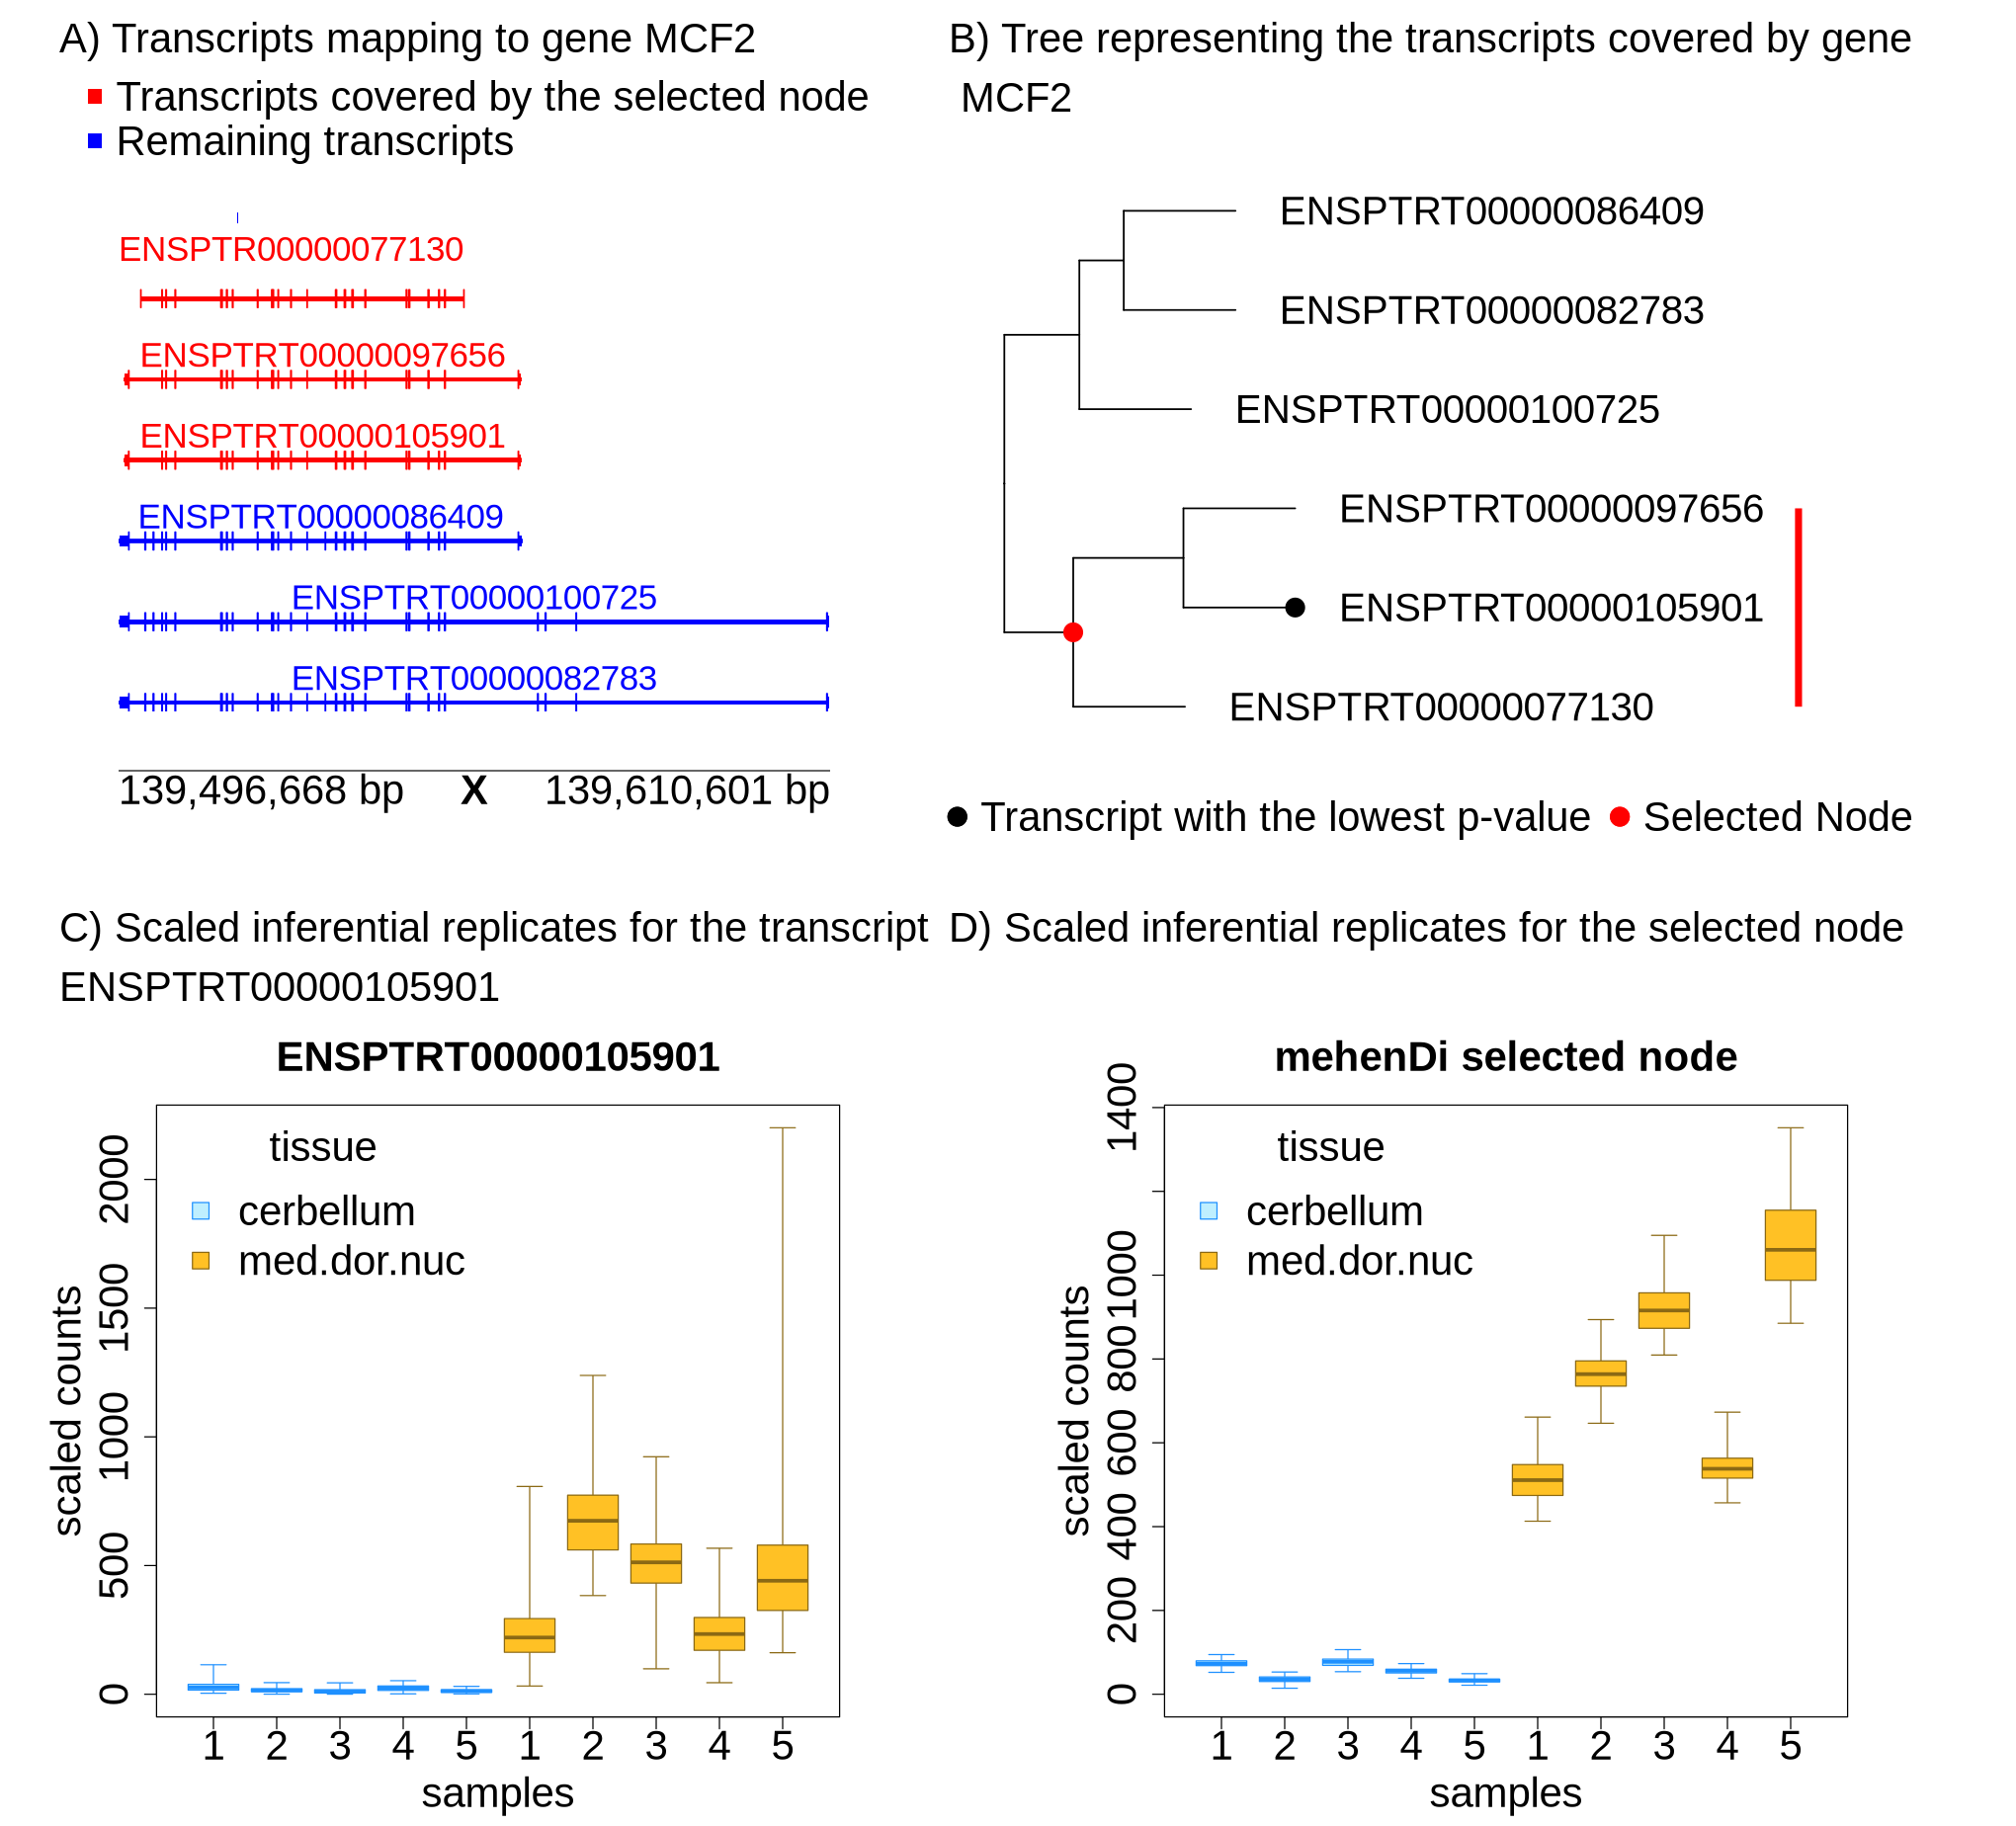

In [6]:
#387,360, 206, 6, 219, 152, 313, 195
i <- 1
j <- 386
size <- 21
cex <- 2.1
tt <- extPreInf(yAll, y, mehenDiNodes, mehenDiDegNodes, txpChimp, genesChimp, i, j)
pI <- plotIReps(yAll, tt$txpMin, tt$iNode, lp="left",x="tissue", cex=cex)
pTree <- plotTree(tt$tSub, 8, tt$minTInd, of=325, xlim=550, size = size+4, tip.size = 8.5)
pgs <- parF(tt$g, tt$txShow, tt$tSub, fs = size, assemb=assemb)

options(repr.plot.width=17, repr.plot.height=15.4)
library(plotgardener)
pageCreate(width = 17, height = 15.4, showGuides = FALSE, default.units = "inches")
par <- pgs[[1]]

parText <- pgParams(
    just = c("left", "top"), fontsize = size+4
)#, fontface = "bold")

parText2 <- pgParams(
    just = c("left", "top"), fontsize = size, fontcolor="red"
)#, fontface = "bold")


hilite <- pgs[[2]]
plotLegend(
    legend = c("Transcripts covered by the selected node", "Remaining transcripts"),
    fill = c("red", "blue"), border = FALSE,
    x = 0.5, y = 0.5, width = 1, height = 1,
    just = c("left", "top"), fontsize=size+4,
)
plotText(label="A) Transcripts mapping to gene MCF2", x = 0.5, y = 0.2,
        params = parText)

plotTranscripts(
    params = par, x = 1, y = 6, width = 6, height = 9.5, 
    spaceHeight=2.5, boxHeight=0.15,
    labels = "transcript", fill="blue", 
    transcriptHighlights = hilite
)

plotGenomeLabel(
  params = par, x = 1, y = 6.5, length=6,
  just = c("left", "top"), fontsize=size+4
)

plotText(label="ENSPTR00000077130", x = 1, y = 2,
        params = parText2)

plotText(label="B) Tree representing the transcripts covered by gene\n MCF2", 
         x = 8, y = 0.2, params = parText)
plotGG(
    plot = pTree,
    x = 8, y = 1.2, width = 8, height=6
)

plotText(label="C) Scaled inferential replicates for the transcript \nENSPTRT00000105901", 
         x = 0.5, y = 7.7, params = parText)

plotGG(
    plot = pI[[1]],
    x = 0.5, y = 8.5, width = 7, height=7
)

plotText(label="D) Scaled inferential replicates for the selected node", 
         x = 8, y = 7.7, params = parText)

plotGG(
    plot = pI[[2]],
    x = 9, y = 8.5, width = 7, height=7
)

[1] "ENSPTRT00000100463" "ENSPTRT00000020240"

Phylogenetic tree with 3 tips and 2 internal nodes.

Tip labels:
  ENSPTRT00000100463, ENSPTRT00000020240, ENSPTRT00000098461
Node labels:
  Node66629, Node66630

Rooted; includes branch lengths.
[1] "Genes ENSPTRG00000010925"
            tx_name1             tx_name2             tx_name3 
"ENSPTRT00000100463" "ENSPTRT00000020240" "ENSPTRT00000098461" 
[1] "ENSPTRT00000100463" "ENSPTRT00000020240" "ENSPTRT00000098461"
[1] TRUE
[1] TRUE


legend[legend1]

text[text1]

transcripts[transcripts1]

genomeLabel[genomeLabel1]

text[text2]

gg[gg1]

text[text2]

gg[gg2]

text[text2]

gg[gg3]



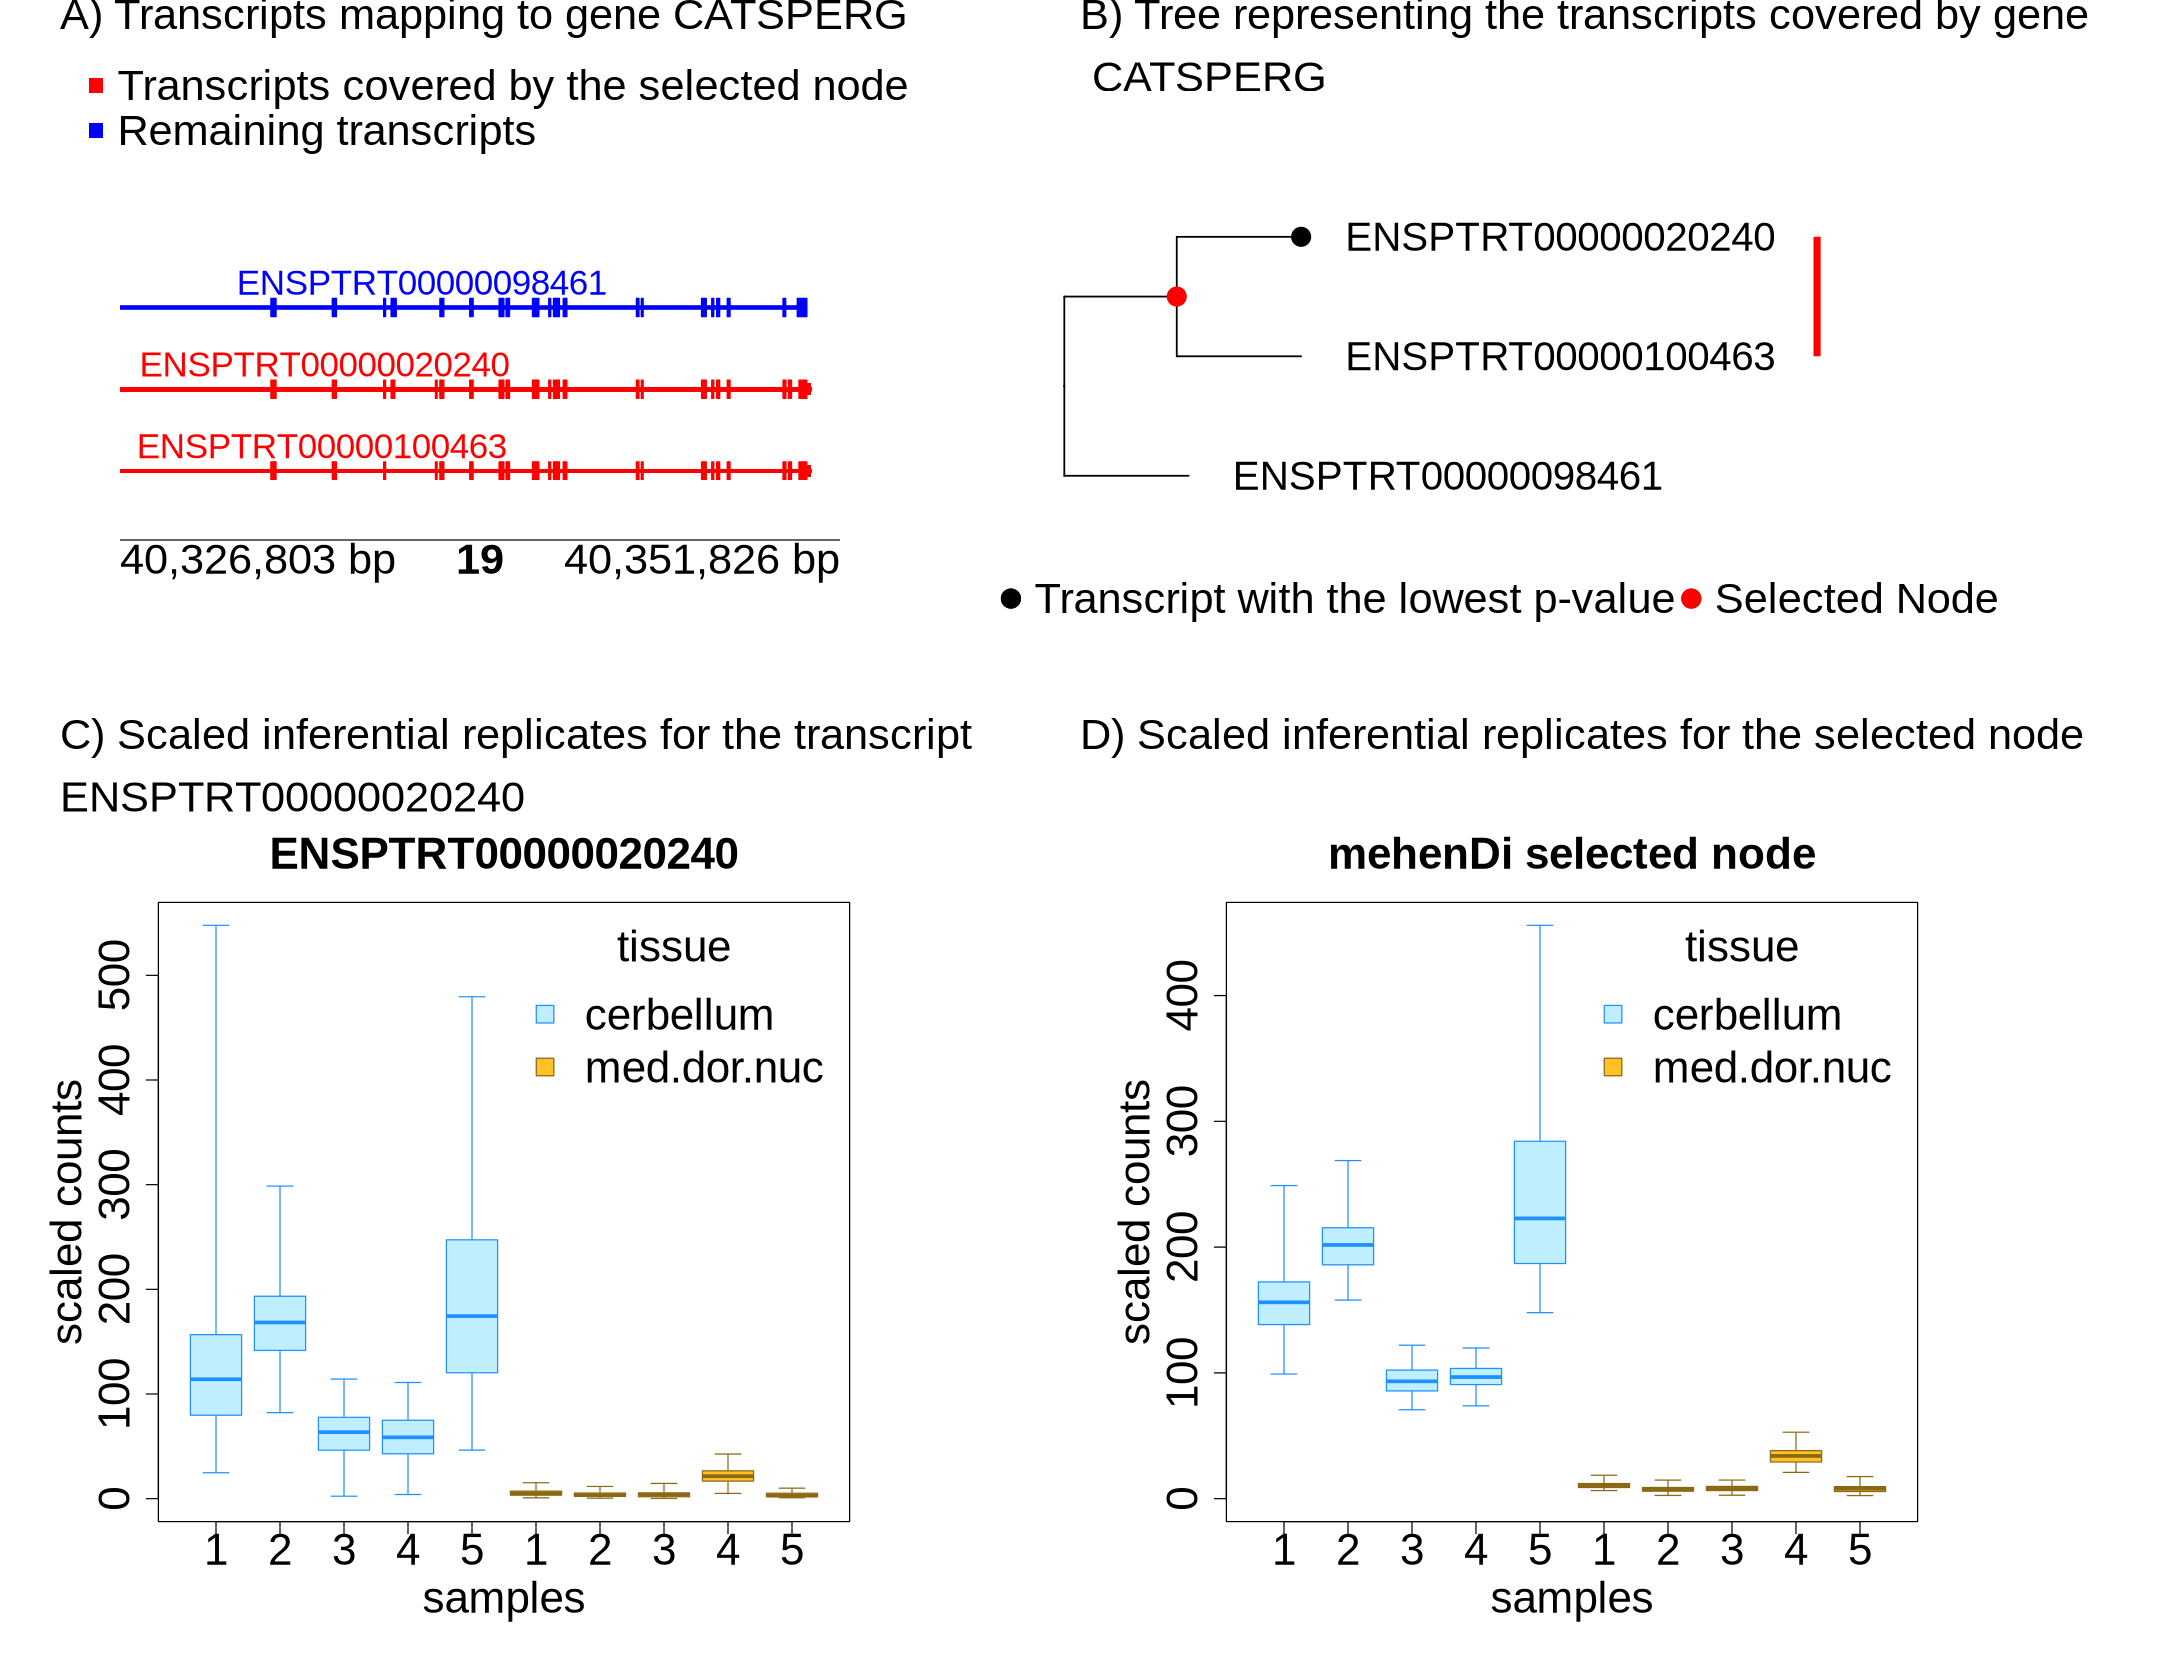

In [7]:
options(repr.plot.width=18, repr.plot.height=14)
i <- 1
j <- 344
size <- 21
cex <- 2.2

tt <- extPreInf(yAll, y, mehenDiNodes, mehenDiDegNodes, txpChimp, genesChimp, i, j)
pI <- plotIReps(yAll, tt$txpMin, tt$iNode, lp="right",x="tissue", cex=cex)
pTree <- plotTree(tt$tSub, 5, tt$minTInd, of=300, xlim=500, size = size+5, tip.size = 8.5)
pgs <- parF(tt$g, tt$txShow, tt$tSub, fs=size, assemb=assemb, chromSt = -10000, chromEnd = 1000)

library(plotgardener)
pageCreate(width = 18, height = 14, showGuides = FALSE, default.units = "inches")
par <- pgs[[1]]

parText <- pgParams(
    just = c("left", "top"), fontsize = size+5
)#, fontface = "bold")


hilite <- pgs[[2]]
plotLegend(
    legend = c("Transcripts covered by the selected node", "Remaining transcripts"),
    fill = c("red", "blue"), border = FALSE,
    x = 0.5, y = 0.4, width = 1, height = 1,
    just = c("left", "top"), fontsize=size+5,
)
plotText(label="A) Transcripts mapping to gene CATSPERG", x = 0.5, y = 0,
        params = parText)

plotTranscripts(
    params = par, x = 1, y = 4, width = 6, height = 7, 
    spaceHeight=2.5, boxHeight=0.15,
    labels = "transcript", fill="blue", 
    transcriptHighlights = hilite
)



plotGenomeLabel(
  params = par, x = 1, y = 4.5, length=6,
  just = c("left", "top"), fontsize=size+5
)

plotText(label="B) Tree representing the transcripts covered by gene \n CATSPERG", 
         x = 9, y = 0, params = parText)
plotGG(
    plot = pTree,
    x = 8.4, y =1.3, width = 8, height=4
)

plotText(label="C) Scaled inferential replicates for the transcript \nENSPTRT00000020240", 
         x = 0.5, y = 6, params = parText)

plotGG(
    plot = pI[[1]],
    x = 0.5, y = 6.7, width = 7, height=7
)

plotText(label="D) Scaled inferential replicates for the selected node", 
         x = 9, y = 6, params = parText)

plotGG(
    plot = pI[[2]],
    x = 9.4, y = 6.7, width = 7, height=7
)

[1] "ENSPTRT00000107110" "ENSPTRT00000013074"

Phylogenetic tree with 3 tips and 2 internal nodes.

Tip labels:
  ENSPTRT00000107110, ENSPTRT00000013074, ENSPTRT00000096752
Node labels:
  Node69317, Node69318

Rooted; includes branch lengths.
[1] "Genes ENSPTRG00000007085"
            tx_name1             tx_name2             tx_name3 
"ENSPTRT00000013074" "ENSPTRT00000107110" "ENSPTRT00000096752" 
[1] "ENSPTRT00000107110" "ENSPTRT00000013074" "ENSPTRT00000096752"
[1] TRUE
[1] TRUE


legend[legend1]

text[text1]

transcripts[transcripts1]

text[text2]

genomeLabel[genomeLabel1]

text[text2]

gg[gg1]

text[text2]

gg[gg2]

text[text2]

gg[gg3]



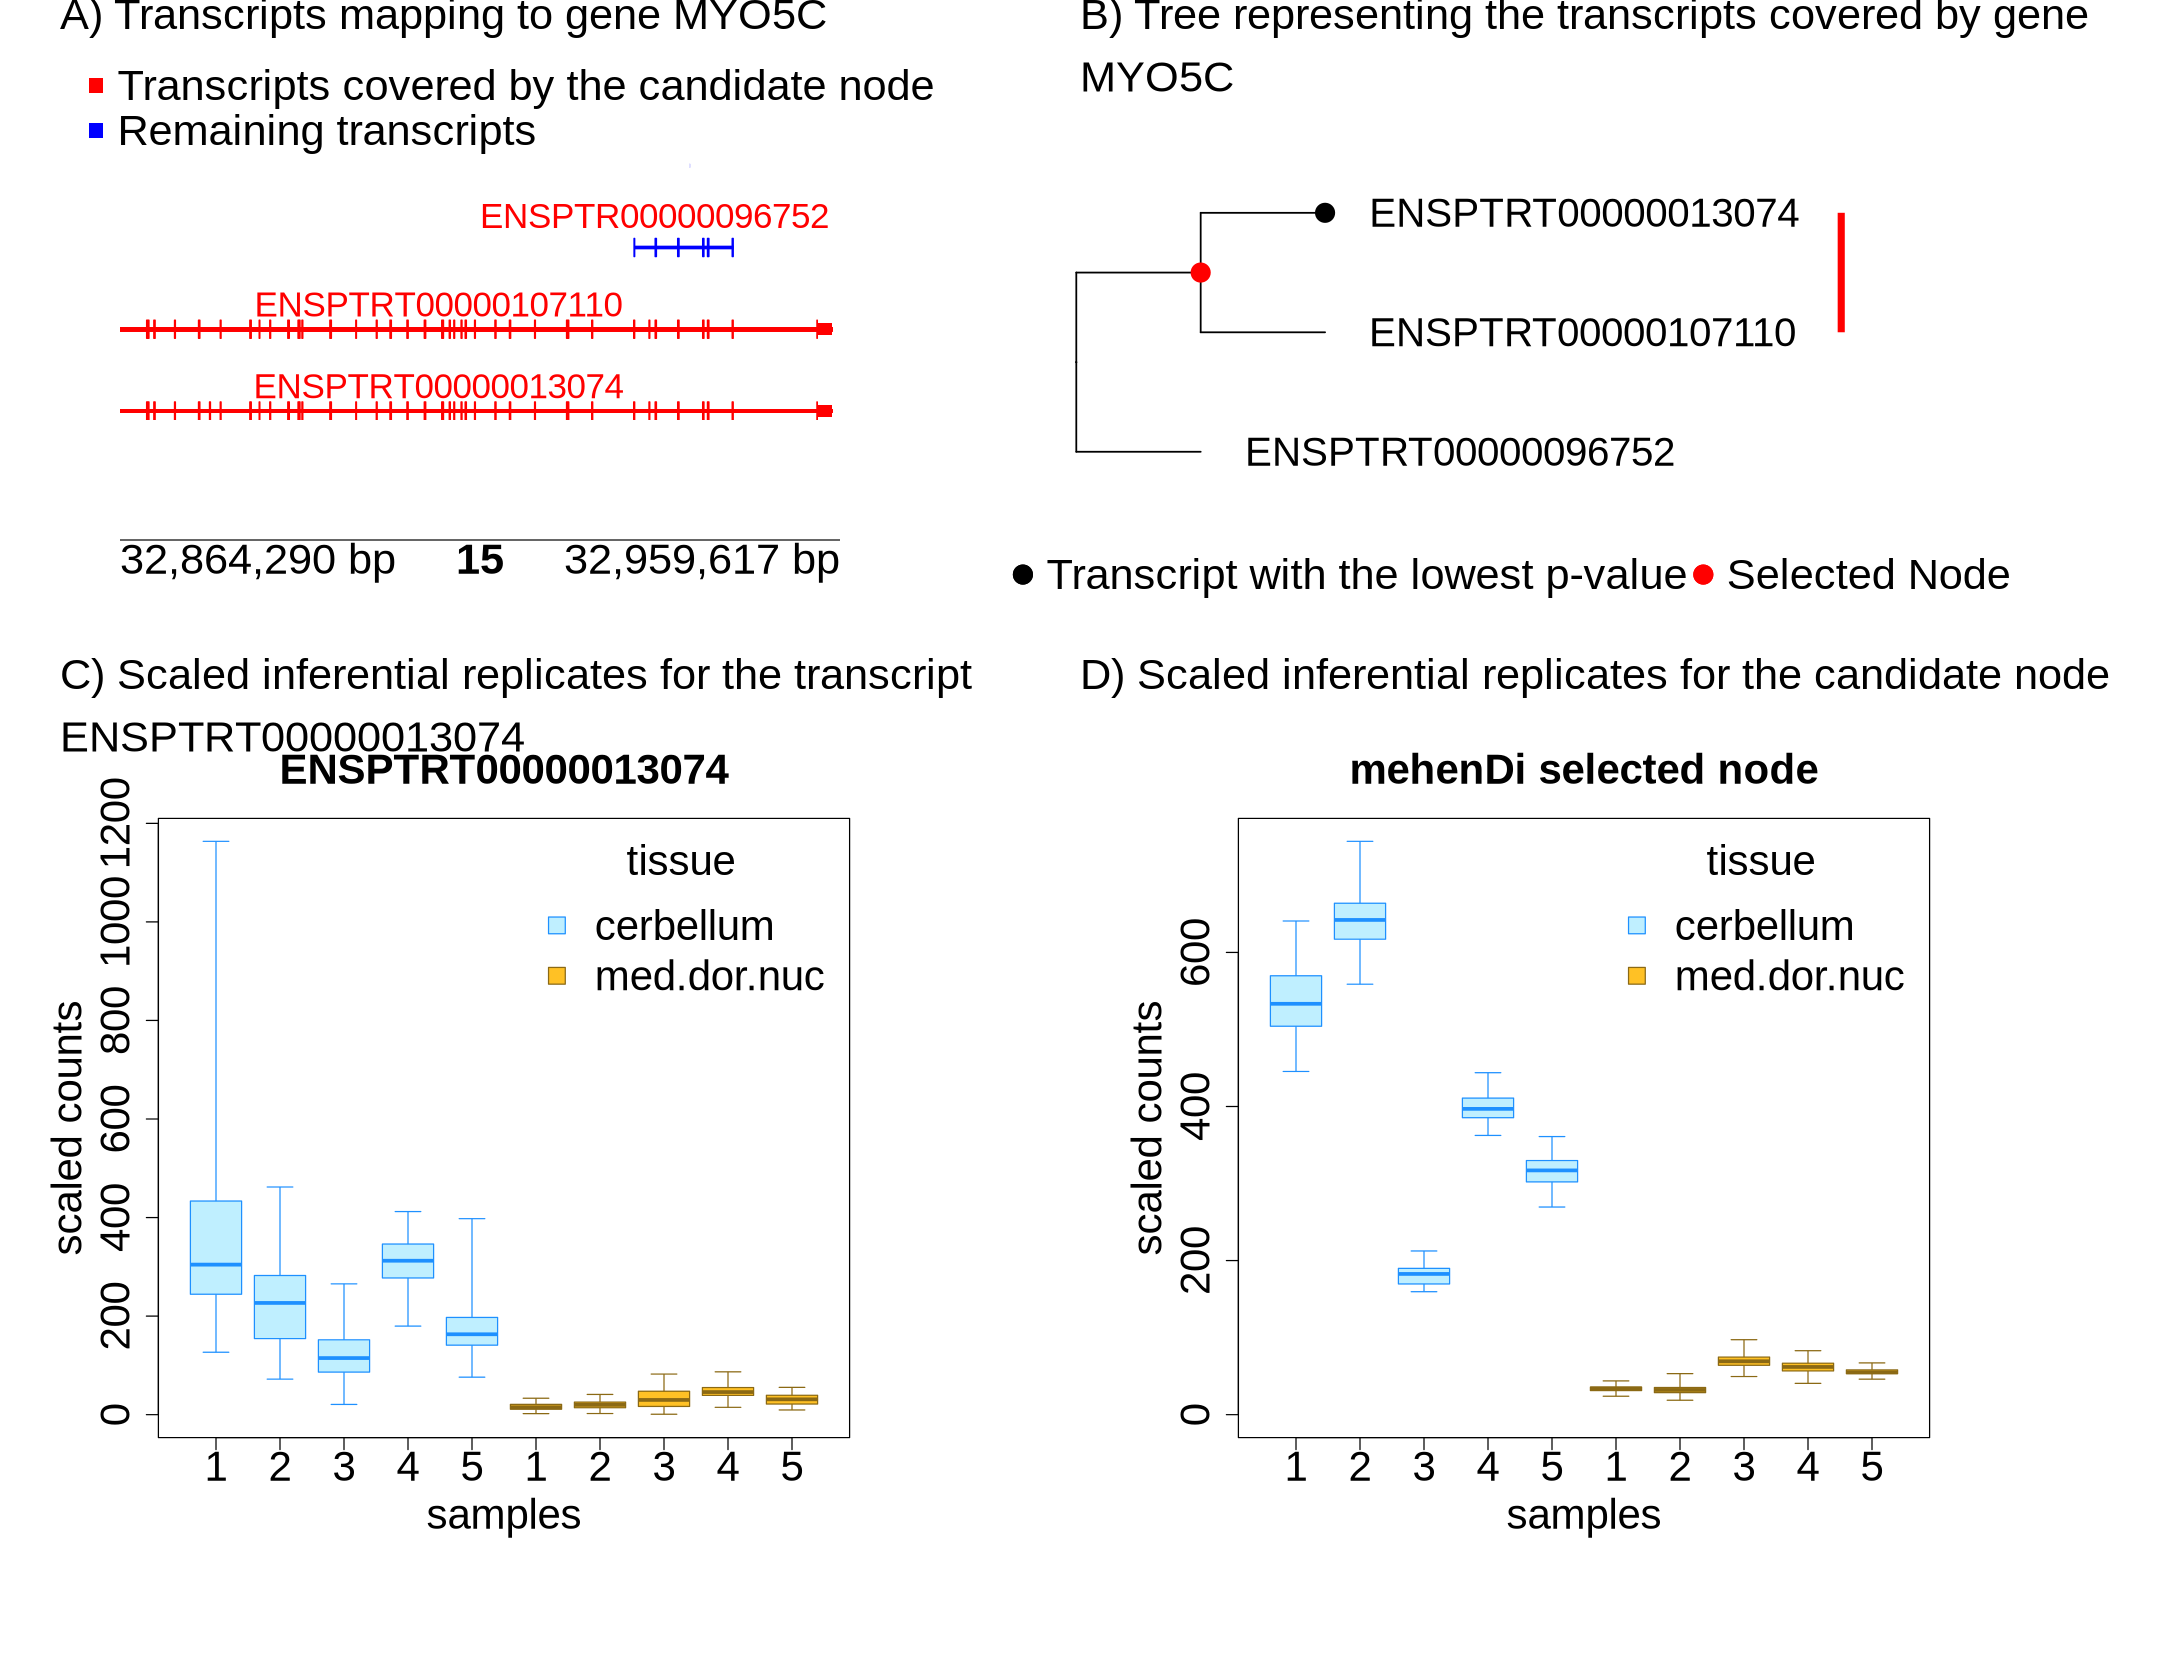

In [8]:
options(repr.plot.width=18, repr.plot.height=14)

size <- 21
cex <- 2.1

i <- 1
j <- 367
tt <- extPreInf(yAll, y, mehenDiNodes, mehenDiDegNodes, txpChimp, genesChimp, i, j)
pI <- plotIReps(yAll, tt$txpMin, tt$iNode, lp="right",x="tissue",cex=cex)
pTree <- plotTree(tt$tSub, 5, tt$minTInd, of=300, xlim=500, size = size+5, tip.size = 8.5)
pgs <- parF(tt$g, tt$txShow, tt$tSub, fs = size, assemb=assemb, chromSt = -10000, chromEnd = 1000)

library(plotgardener)
pageCreate(width = 18, height = 14, showGuides = FALSE, default.units = "inches")
par <- pgs[[1]]

parText <- pgParams(
    just = c("left", "top"), fontsize = size+5
)#, fontface = "bold")

parText2 <- pgParams(
    just = c("left", "top"), fontsize = size, fontcolor = "red"
)

hilite <- pgs[[2]]
plotLegend(
    legend = c("Transcripts covered by the candidate node", "Remaining transcripts"),
    fill = c("red", "blue"), border = FALSE,
    x = 0.5, y = 0.4, width = 1, height = 1,
    just = c("left", "top"), fontsize=size+5,
)
plotText(label="A) Transcripts mapping to gene MYO5C", x = 0.5, y = 0,
        params = parText)

plotTranscripts(
    params = par, x = 1, y = 3.5, width = 6, height = 6.5, 
    spaceHeight=2.5, boxHeight=0.15,
    labels = "transcript", fill="blue", 
    transcriptHighlights = hilite
)

plotText(label="ENSPTR00000096752", x = 4, y = 1.7,
        params = parText2)

plotGenomeLabel(
  params = par, x = 1, y = 4.5, length=6,
  just = c("left", "top"), fontsize=size+5
)

plotText(label="B) Tree representing the transcripts covered by gene \nMYO5C", 
         x = 9, y = 0, params = parText)
plotGG(
    plot = pTree,
    x = 8.5, y = 1.1, width = 8, height=4
)

plotText(label="C) Scaled inferential replicates for the transcript \nENSPTRT00000013074", 
         x = 0.5, y = 5.5, params = parText)

plotGG(
    plot = pI[[1]],
    x = 0.5, y = 6, width = 7, height=7
)

plotText(label="D) Scaled inferential replicates for the candidate node", 
         x = 9, y = 5.5, params = parText)

plotGG(
    plot = pI[[2]],
    x = 9.5, y = 6, width = 7, height=7
)

In [18]:
options(repr.plot.width=18, repr.plot.height=14)
size <- 23
cex <- 2.3
i <- 1
j <- 269
tt <- extPreInf(yAll, y, mehenDiNodes, mehenDiDegNodes, txpChimp, genesChimp, i, j)
pI <- plotIReps(yAll, tt$txpMin, tt$iNode, lp="left",x="tissue", cex=cex)
pTree <- plotTree(tt$tSub, 9, tt$minTInd, of=300, xlim=500, size = size+5, tip.size = 8.5)
pgs <- parF(tt$g, tt$txShow, tt$tSub, fs=size, assemb=assemb, chromSt = -10000, chromEnd = 1000)

pdf("../images/Chimp/Figure10.pdf", width=18, height=14)
library(plotgardener)
pageCreate(width = 18, height = 14, showGuides = FALSE, default.units = "inches")
par <- pgs[[1]]

parText <- pgParams(
    just = c("left", "top"), fontsize = size+5
)#, fontface = "bold")

parTxpR  <- pgParams(
    fontsize = size,
    fontcolor="red"
)
parTxpB  <- pgParams(
    fontsize = size,
    fontcolor="blue"
)

hilite <- pgs[[2]]
plotLegend(
    legend = c("Transcripts covered by the selected node", "Remaining transcripts"),
    fill = c("red", "blue"), border = FALSE,
    x = 0.5, y = 0.8, width = 1, height = 1,
    just = c("left", "top"), fontsize=size+5,
)
plotText(label="A) Transcripts mapping to gene EYA4", x = 0.5, y = 0.3,
        params = parText)

plotTranscripts(
    params = par, x = 1, y = 5, width = 6, height = 8, 
    spaceHeight=2.5, boxHeight=0.15,
    labels = "transcript", fill="blue", 
    transcriptHighlights = hilite
)
plotText(label="ENSPTRT00000104666", x = 5.3, y = 2,
        params = parTxpR)
plotText(label="ENSPTRT00000034383", x = 5.3, y = 2.7,
        params = parTxpR)
plotText(label="ENSPTRT00000082797", x = 5.3, y = 3.4,
        params = parTxpB)

plotGenomeLabel(
  params = par, x = 1, y = 5.3, length=6,
  just = c("left", "top"), fontsize=size+5
)

plotText(label="B) Tree representing the transcripts covered by gene \nEYA4", 
         x = 8.8, y = 0.3, params = parText)
plotGG(
    plot = pTree,
    x = 9.2, y =1.3, width = 8, height=4
)

plotText(label="C) Scaled inferential replicates for the transcript \nENSPTRT00000104666", 
         x = 0.5, y = 6, params = parText)

plotGG(
    plot = pI[[1]],
    x = 0.5, y = 6.8, width = 7, height=7
)

plotText(label="D) Scaled inferential replicates for the selected node", 
         x = 8.8, y = 6, params = parText)

plotGG(
    plot = pI[[2]],
    x = 9.4, y = 6.8, width = 7, height=7
)
dev.off()

[1] "ENSPTRT00000104666" "ENSPTRT00000034383"

Phylogenetic tree with 5 tips and 4 internal nodes.

Tip labels:
  ENSPTRT00000104666, ENSPTRT00000034383, ENSPTRT00000101457, ENSPTRT00000082797, ENSPTRT00000079092
Node labels:
  Node62554, Node62555, Node62556, Node62557

Rooted; includes branch lengths.
[1] "Genes ENSPTRG00000018619"
            tx_name1             tx_name2             tx_name3 
"ENSPTRT00000101457" "ENSPTRT00000079092" "ENSPTRT00000082797" 
            tx_name4             tx_name5 
"ENSPTRT00000034383" "ENSPTRT00000104666" 
[1] "ENSPTRT00000104666" "ENSPTRT00000034383" "ENSPTRT00000101457"
[4] "ENSPTRT00000082797" "ENSPTRT00000079092"
[1] TRUE
[1] TRUE


legend[legend1]

text[text1]

transcripts[transcripts1]

text[text2]

text[text2]

text[text2]

genomeLabel[genomeLabel1]

text[text2]

Warning message:
“Removed 1 row containing missing values or values outside the scale range (`geom_text()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range (`geom_segment()`).”
gg[gg1]

text[text2]

gg[gg2]

text[text2]

gg[gg3]



png 
  2

[1] "ENSPTRT00000104666" "ENSPTRT00000034383"

Phylogenetic tree with 5 tips and 4 internal nodes.

Tip labels:
  ENSPTRT00000104666, ENSPTRT00000034383, ENSPTRT00000101457, ENSPTRT00000082797, ENSPTRT00000079092
Node labels:
  Node62554, Node62555, Node62556, Node62557

Rooted; includes branch lengths.
[1] "Genes ENSPTRG00000018619"
            tx_name1             tx_name2             tx_name3 
"ENSPTRT00000101457" "ENSPTRT00000079092" "ENSPTRT00000082797" 
            tx_name4             tx_name5 
"ENSPTRT00000034383" "ENSPTRT00000104666" 
[1] "ENSPTRT00000104666" "ENSPTRT00000034383" "ENSPTRT00000101457"
[4] "ENSPTRT00000082797" "ENSPTRT00000079092"
[1] TRUE
[1] TRUE


legend[legend1]

text[text1]

transcripts[transcripts1]

text[text2]

text[text2]

text[text2]

genomeLabel[genomeLabel1]

text[text2]

Warning message:
“Removed 1 row containing missing values or values outside the scale range (`geom_text()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range (`geom_segment()`).”
gg[gg1]

text[text2]

gg[gg2]

text[text2]

gg[gg3]



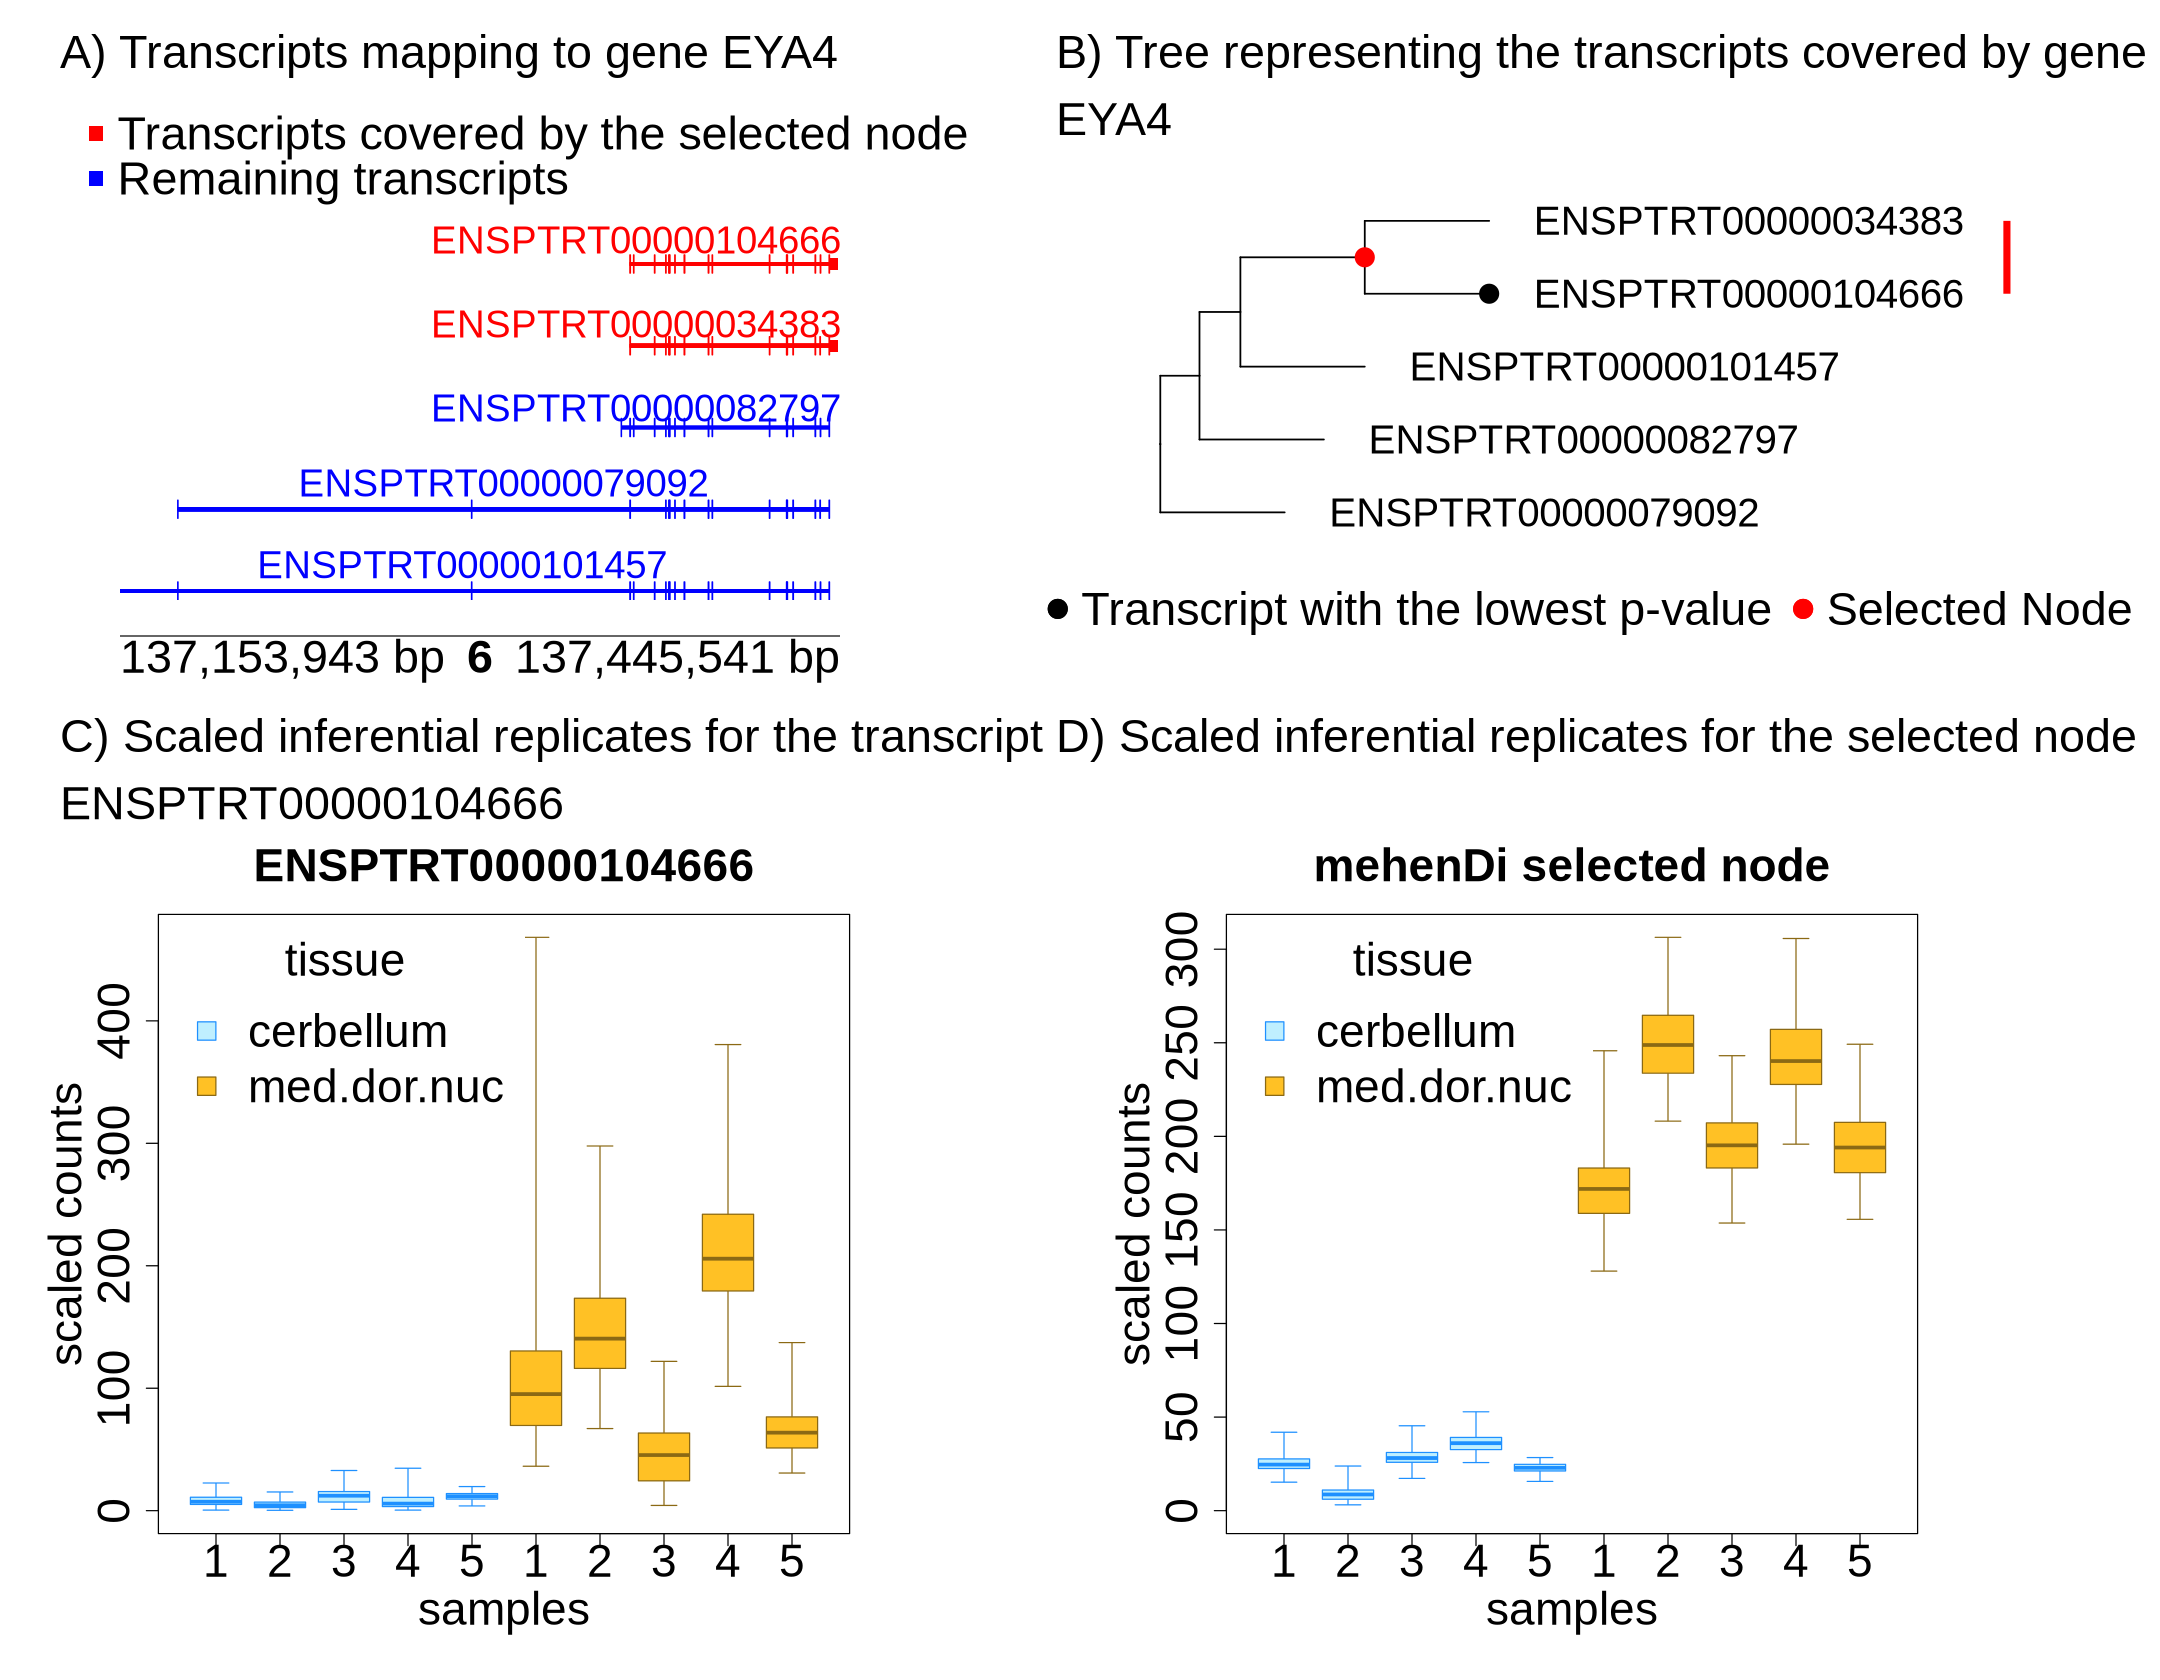

In [17]:
options(repr.plot.width=18, repr.plot.height=14)
size <- 23
cex <- 2.3
i <- 1
j <- 269
tt <- extPreInf(yAll, y, mehenDiNodes, mehenDiDegNodes, txpChimp, genesChimp, i, j)
pI <- plotIReps(yAll, tt$txpMin, tt$iNode, lp="left",x="tissue", cex=cex)
pTree <- plotTree(tt$tSub, 9, tt$minTInd, of=300, xlim=500, size = size+5, tip.size = 8.5)
pgs <- parF(tt$g, tt$txShow, tt$tSub, fs=size, assemb=assemb, chromSt = -10000, chromEnd = 1000)


library(plotgardener)
pageCreate(width = 18, height = 14, showGuides = FALSE, default.units = "inches")
par <- pgs[[1]]

parText <- pgParams(
    just = c("left", "top"), fontsize = size+5
)#, fontface = "bold")

parTxpR  <- pgParams(
    fontsize = size,
    fontcolor="red"
)
parTxpB  <- pgParams(
    fontsize = size,
    fontcolor="blue"
)

hilite <- pgs[[2]]
plotLegend(
    legend = c("Transcripts covered by the selected node", "Remaining transcripts"),
    fill = c("red", "blue"), border = FALSE,
    x = 0.5, y = 0.8, width = 1, height = 1,
    just = c("left", "top"), fontsize=size+5,
)
plotText(label="A) Transcripts mapping to gene EYA4", x = 0.5, y = 0.3,
        params = parText)

plotTranscripts(
    params = par, x = 1, y = 5, width = 6, height = 8, 
    spaceHeight=2.5, boxHeight=0.15,
    labels = "transcript", fill="blue", 
    transcriptHighlights = hilite
)
plotText(label="ENSPTRT00000104666", x = 5.3, y = 2,
        params = parTxpR)
plotText(label="ENSPTRT00000034383", x = 5.3, y = 2.7,
        params = parTxpR)
plotText(label="ENSPTRT00000082797", x = 5.3, y = 3.4,
        params = parTxpB)

plotGenomeLabel(
  params = par, x = 1, y = 5.3, length=6,
  just = c("left", "top"), fontsize=size+5
)

plotText(label="B) Tree representing the transcripts covered by gene \nEYA4", 
         x = 8.8, y = 0.3, params = parText)
plotGG(
    plot = pTree,
    x = 9.2, y =1.4, width = 8, height=4
)

plotText(label="C) Scaled inferential replicates for the transcript \nENSPTRT00000104666", 
         x = 0.5, y = 6, params = parText)

plotGG(
    plot = pI[[1]],
    x = 0.5, y = 6.8, width = 7, height=7
)

plotText(label="D) Scaled inferential replicates for the selected node", 
         x = 8.8, y = 6, params = parText)

plotGG(
    plot = pI[[2]],
    x = 9.4, y = 6.8, width = 7, height=7
)


In [10]:
options(repr.plot.width=18, repr.plot.height=14)

size <- 22
cex <- 2.2
i <- 1
j <- 252
tt <- extPreInf(yAll, y, mehenDiNodes, mehenDiDegNodes, txpChimp, genesChimp, i, j)
pI <- plotIReps(yAll, tt$txpMin, tt$iNode, lp="left",x="tissue", cex=cex)
pTree <- plotTree(tt$tSub, 6, tt$minTInd, of=300, xlim=500, size=size+5, tip.size = 8.5)
pgs <- parF(tt$g, tt$txShow, tt$tSub, fs=size,assemb=assemb, chromSt = -10000, chromEnd = 10)

pdf("../images/Chimp/Figure11.pdf", height = 14, width = 18)
library(plotgardener)
pageCreate(width = 18, height = 14, showGuides = FALSE, default.units = "inches")
par <- pgs[[1]]

parTxpB  <- pgParams(
    fontsize = size,
    fontcolor="blue"
)
parText <- pgParams(
    just = c("left", "top"), fontsize = size+5
)#, fontface = "bold")

hilite <- pgs[[2]]
plotLegend(
    legend = c("Transcripts covered by the selected node", "Remaining transcripts"),
    fill = c("red", "blue"), border = FALSE,
    x = 0.5, y = 0.7, width = 1, height = 1,
    just = c("left", "top"), fontsize=size+5,
)
plotText(label="A) Transcripts mapping to gene DNAH9", x = 0.5, y = 0.2,
        params = parText)
plotText(label="ENSPTRT00000106916", x = 2.5, y = 2.3,
        params = parTxpB)


plotTranscripts(
    params = par, x = 1, y = 4.7, width = 6, height = 6.5, 
    spaceHeight=2.5, boxHeight=0.15,
    labels = "transcript", fill="blue", 
    transcriptHighlights = hilite
)

plotGenomeLabel(
  params = par, x = 1, y = 5, length=6,
  just = c("left", "top"), fontsize=size+5
)

plotText(label="B) Tree representing the transcripts covered by gene \nDNAH9", 
         x = 9, y = 0.2, params = parText)
plotGG(
    plot = pTree,
    x = 8.8, y=1.1, width = 8, height=4
)

plotText(label="C) Scaled inferential replicates for the transcript \nENSPTRT00000100696", 
         x = 0.5, y = 6, params = parText)

plotGG(
    plot = pI[[1]],
    x = 0.5, y = 6.7, width = 7, height=7
)

plotText(label="D) Scaled inferential replicates for the selected node", 
         x = 9, y = 6, params = parText)

plotGG(
    plot = pI[[2]],
    x = 9.4, y = 6.7, width = 7, height=7
)
dev.off()

[1] "ENSPTRT00000110284" "ENSPTRT00000043834" "ENSPTRT00000100696"

Phylogenetic tree with 4 tips and 3 internal nodes.

Tip labels:
  ENSPTRT00000110284, ENSPTRT00000043834, ENSPTRT00000100696, ENSPTRT00000106916
Node labels:
  Node61676, Node61677, Node61678

Rooted; includes branch lengths.
[1] "Genes ENSPTRG00000008779"
            tx_name1             tx_name2             tx_name3 
"ENSPTRT00000106916" "ENSPTRT00000110284" "ENSPTRT00000043834" 
            tx_name4 
"ENSPTRT00000100696" 
[1] "ENSPTRT00000110284" "ENSPTRT00000043834" "ENSPTRT00000100696"
[4] "ENSPTRT00000106916"
[1] TRUE
[1] TRUE


legend[legend1]

text[text1]

text[text2]

transcripts[transcripts1]

genomeLabel[genomeLabel1]

text[text2]

gg[gg1]

text[text2]

gg[gg2]

text[text2]

gg[gg3]



png 
  2

[1] "ENSPTRT00000110284" "ENSPTRT00000043834" "ENSPTRT00000100696"

Phylogenetic tree with 4 tips and 3 internal nodes.

Tip labels:
  ENSPTRT00000110284, ENSPTRT00000043834, ENSPTRT00000100696, ENSPTRT00000106916
Node labels:
  Node61676, Node61677, Node61678

Rooted; includes branch lengths.
[1] "Genes ENSPTRG00000008779"
            tx_name1             tx_name2             tx_name3 
"ENSPTRT00000106916" "ENSPTRT00000110284" "ENSPTRT00000043834" 
            tx_name4 
"ENSPTRT00000100696" 
[1] "ENSPTRT00000110284" "ENSPTRT00000043834" "ENSPTRT00000100696"
[4] "ENSPTRT00000106916"
[1] TRUE
[1] TRUE


legend[legend1]

text[text1]

text[text2]

transcripts[transcripts1]

genomeLabel[genomeLabel1]

text[text2]

gg[gg1]

text[text2]

gg[gg2]

text[text2]

gg[gg3]



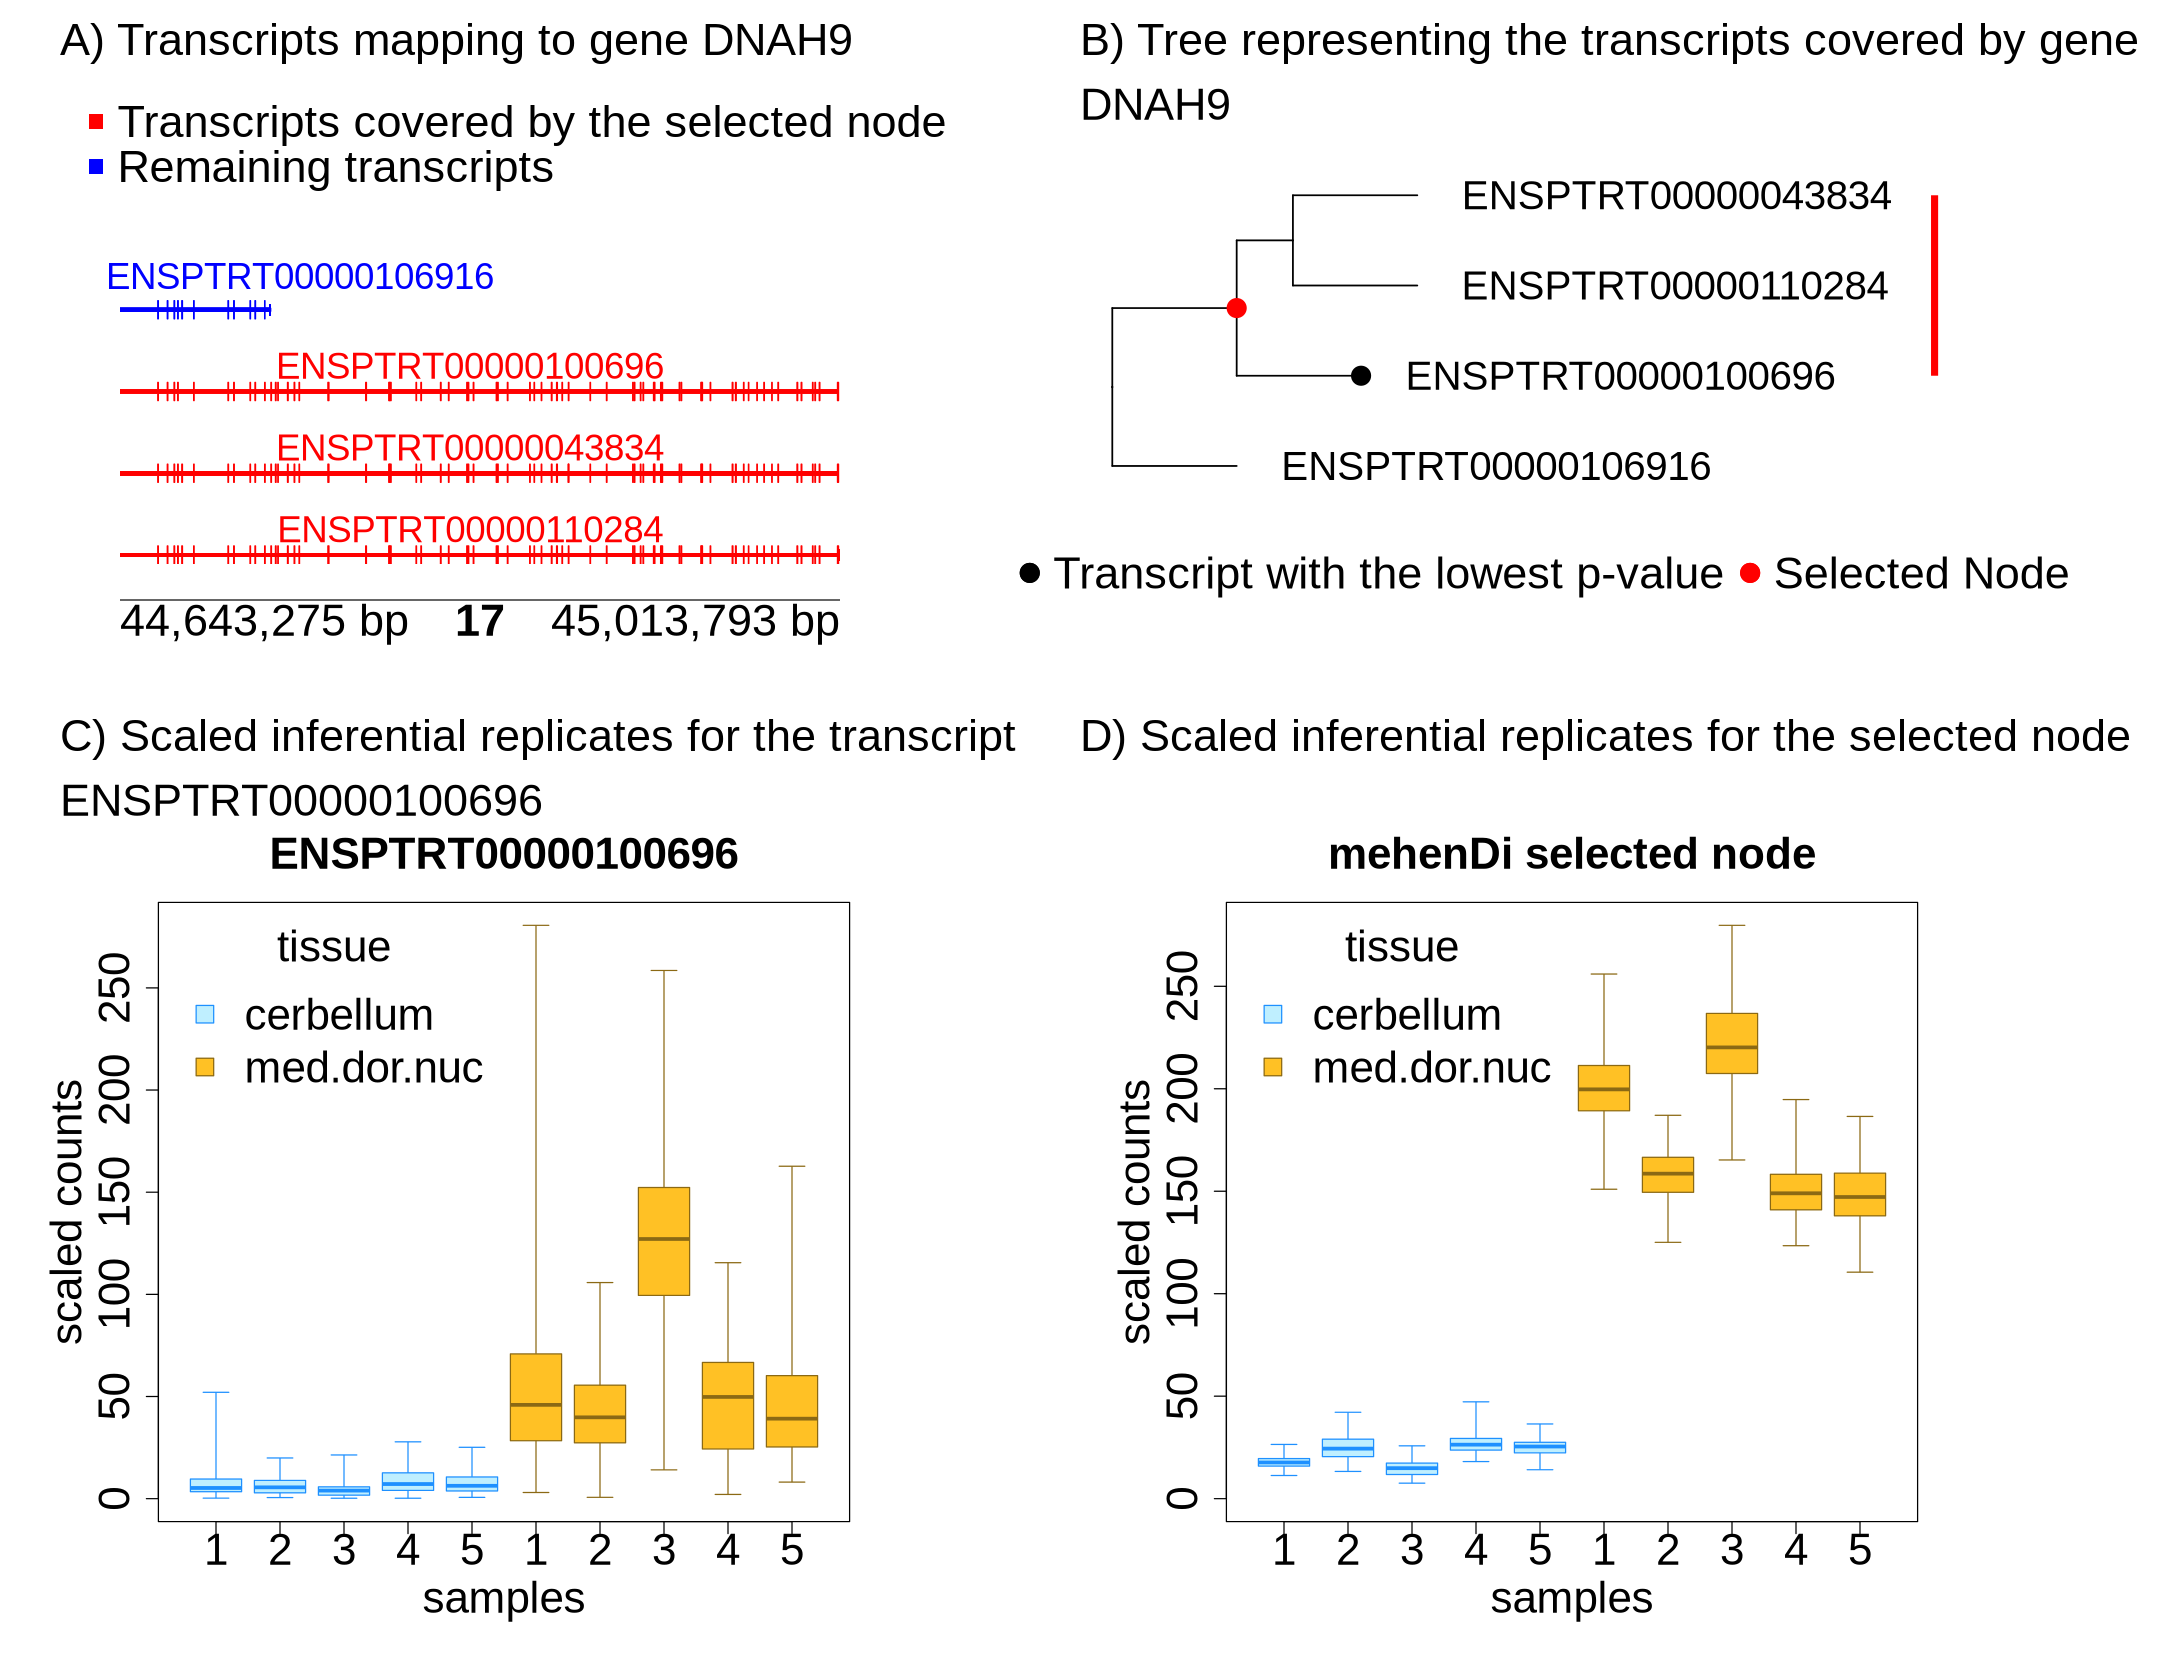

In [19]:
options(repr.plot.width=18, repr.plot.height=14)

size <- 22
cex <- 2.2
i <- 1
j <- 252
tt <- extPreInf(yAll, y, mehenDiNodes, mehenDiDegNodes, txpChimp, genesChimp, i, j)
pI <- plotIReps(yAll, tt$txpMin, tt$iNode, lp="left",x="tissue", cex=cex)
pTree <- plotTree(tt$tSub, 6, tt$minTInd, of=300, xlim=500, size=size+5, tip.size = 8.5)
pgs <- parF(tt$g, tt$txShow, tt$tSub, fs=size,assemb=assemb, chromSt = -10000, chromEnd = 10)

library(plotgardener)
pageCreate(width = 18, height = 14, showGuides = FALSE, default.units = "inches")
par <- pgs[[1]]

parTxpB  <- pgParams(
    fontsize = size,
    fontcolor="blue"
)
parText <- pgParams(
    just = c("left", "top"), fontsize = size+5
)#, fontface = "bold")

hilite <- pgs[[2]]
plotLegend(
    legend = c("Transcripts covered by the selected node", "Remaining transcripts"),
    fill = c("red", "blue"), border = FALSE,
    x = 0.5, y = 0.7, width = 1, height = 1,
    just = c("left", "top"), fontsize=size+5,
)
plotText(label="A) Transcripts mapping to gene DNAH9", x = 0.5, y = 0.2,
        params = parText)
plotText(label="ENSPTRT00000106916", x = 2.5, y = 2.3,
        params = parTxpB)


plotTranscripts(
    params = par, x = 1, y = 4.7, width = 6, height = 6.5, 
    spaceHeight=2.5, boxHeight=0.15,
    labels = "transcript", fill="blue", 
    transcriptHighlights = hilite
)

plotGenomeLabel(
  params = par, x = 1, y = 5, length=6,
  just = c("left", "top"), fontsize=size+5
)

plotText(label="B) Tree representing the transcripts covered by gene \nDNAH9", 
         x = 9, y = 0.2, params = parText)
plotGG(
    plot = pTree,
    x = 8.8, y=1.1, width = 8, height=4
)

plotText(label="C) Scaled inferential replicates for the transcript \nENSPTRT00000100696", 
         x = 0.5, y = 6, params = parText)

plotGG(
    plot = pI[[1]],
    x = 0.5, y = 6.7, width = 7, height=7
)

plotText(label="D) Scaled inferential replicates for the selected node", 
         x = 9, y = 6, params = parText)

plotGG(
    plot = pI[[2]],
    x = 9.4, y = 6.7, width = 7, height=7
)


[1] "ENSPTRT00000097751" "ENSPTRT00000037658"

Phylogenetic tree with 3 tips and 2 internal nodes.

Tip labels:
  ENSPTRT00000097751, ENSPTRT00000037658, ENSPTRT00000083071
Node labels:
  Node49768, Node49769

Rooted; includes branch lengths.
[1] "Genes ENSPTRG00000020337"
            tx_name1             tx_name2             tx_name3 
"ENSPTRT00000097751" "ENSPTRT00000083071" "ENSPTRT00000037658" 
[1] "ENSPTRT00000097751" "ENSPTRT00000037658" "ENSPTRT00000083071"
[1] TRUE
[1] TRUE


legend[legend1]

text[text1]

transcripts[transcripts1]

genomeLabel[genomeLabel1]

text[text2]

gg[gg1]

text[text2]

gg[gg2]

text[text2]

gg[gg3]



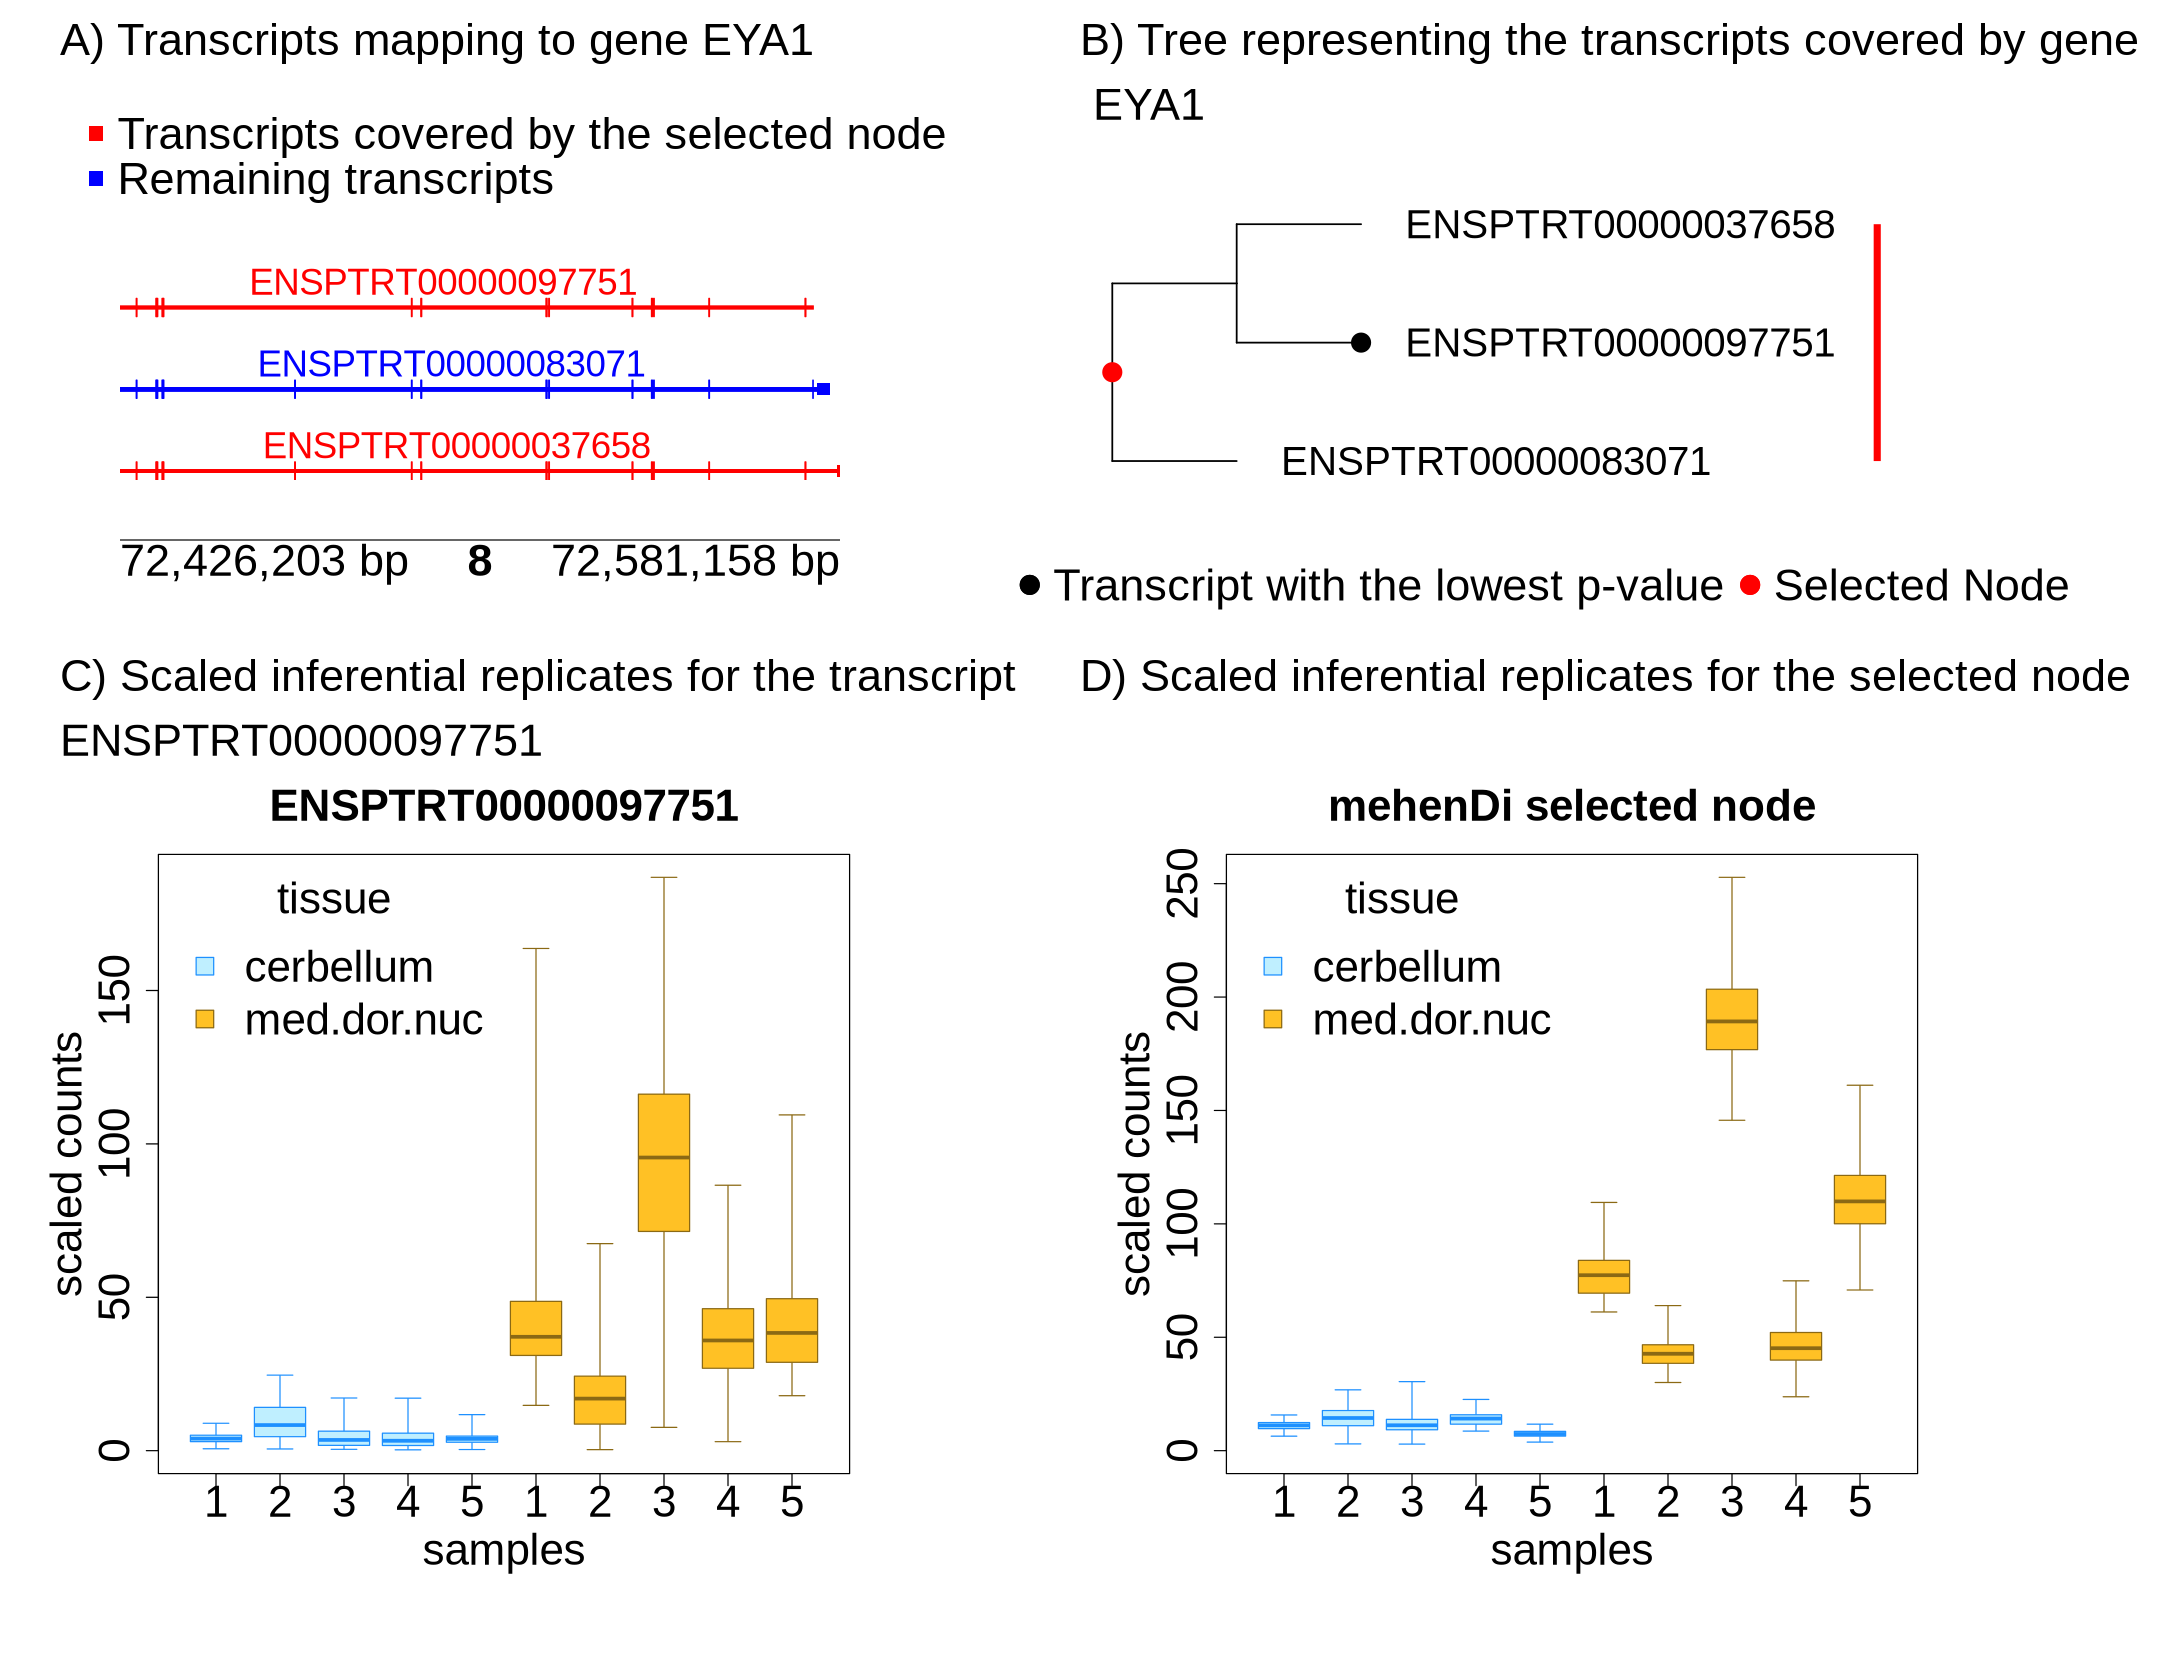

In [11]:
options(repr.plot.width=18, repr.plot.height=14)
size <- 22
cex <- 2.2
i <- 1
j <- 70

tt <- extPreInf(yAll, y, mehenDiNodes, mehenDiDegNodes, txpChimp, genesChimp, i, j)
pI <- plotIReps(yAll, tt$txpMin, tt$iNode, lp="left",x="tissue", cex=cex)
pTree <- plotTree(tt$tSub, 4, tt$minTInd, of=300, xlim=500, tip.size = 8.5, size = size+5)
pgs <- parF(tt$g, tt$txShow, tt$tSub, fs=size, assemb=assemb, chromSt = -10000, chromEnd = 10)

library(plotgardener)
pageCreate(width = 18, height = 14, showGuides = FALSE, default.units = "inches")
par <- pgs[[1]]

parText <- pgParams(
    just = c("left", "top"), fontsize = size+5
)#, fontface = "bold")



hilite <- pgs[[2]]
plotLegend(
    legend = c("Transcripts covered by the selected node", "Remaining transcripts"),
    fill = c("red", "blue"), border = FALSE,
    x = 0.5, y = 0.8, width = 1, height = 1,
    just = c("left", "top"), fontsize=size+5,
)
plotText(label="A) Transcripts mapping to gene EYA1", x = 0.5, y = 0.2,
        params = parText)

plotTranscripts(
    params = par, x = 1, y = 4, width = 6, height = 6.5, 
    spaceHeight=2.5, boxHeight=0.15,
    labels = "transcript", fill="blue", 
    transcriptHighlights = hilite
)

plotGenomeLabel(
  params = par, x = 1, y = 4.5, length=6,
  just = c("left", "top"), fontsize=size+5
)

plotText(label="B) Tree representing the transcripts covered by gene\n EYA1", 
         x = 9, y = 0.2, params = parText)
plotGG(
    plot = pTree,
    x = 8.8, y = 1.2, width = 8, height=4
)

plotText(label="C) Scaled inferential replicates for the transcript \nENSPTRT00000097751", 
         x = 0.5, y = 5.5, params = parText)

plotGG(
    plot = pI[[1]],
    x = 0.5, y = 6.3, width = 7, height=7
)

plotText(label="D) Scaled inferential replicates for the selected node", 
         x = 9, y = 5.5, params = parText)

plotGG(
    plot = pI[[2]],
    x = 9.4, y = 6.3, width = 7, height=7
)

[1] "ENSPTRT00000094046" "ENSPTRT00000076996" "ENSPTRT00000018121"
[4] "ENSPTRT00000100719"

Phylogenetic tree with 6 tips and 5 internal nodes.

Tip labels:
  ENSPTRT00000094046, ENSPTRT00000076996, ENSPTRT00000018121, ENSPTRT00000100719, ENSPTRT00000076649, ENSPTRT00000111345
Node labels:
  Node49233, Node49234, Node49235, Node49236, Node49237

Rooted; includes branch lengths.
[1] "Genes ENSPTRG00000009868"
            tx_name1             tx_name2             tx_name3 
"ENSPTRT00000094046" "ENSPTRT00000076996" "ENSPTRT00000076649" 
            tx_name4             tx_name5             tx_name6 
"ENSPTRT00000018121" "ENSPTRT00000111345" "ENSPTRT00000100719" 
[1] "ENSPTRT00000094046" "ENSPTRT00000076996" "ENSPTRT00000018121"
[4] "ENSPTRT00000100719" "ENSPTRT00000076649" "ENSPTRT00000111345"
[1] TRUE
[1] TRUE


legend[legend1]

text[text1]

transcripts[transcripts1]

text[text2]

genomeLabel[genomeLabel1]

text[text2]

gg[gg1]

text[text2]

gg[gg2]

text[text2]

gg[gg3]



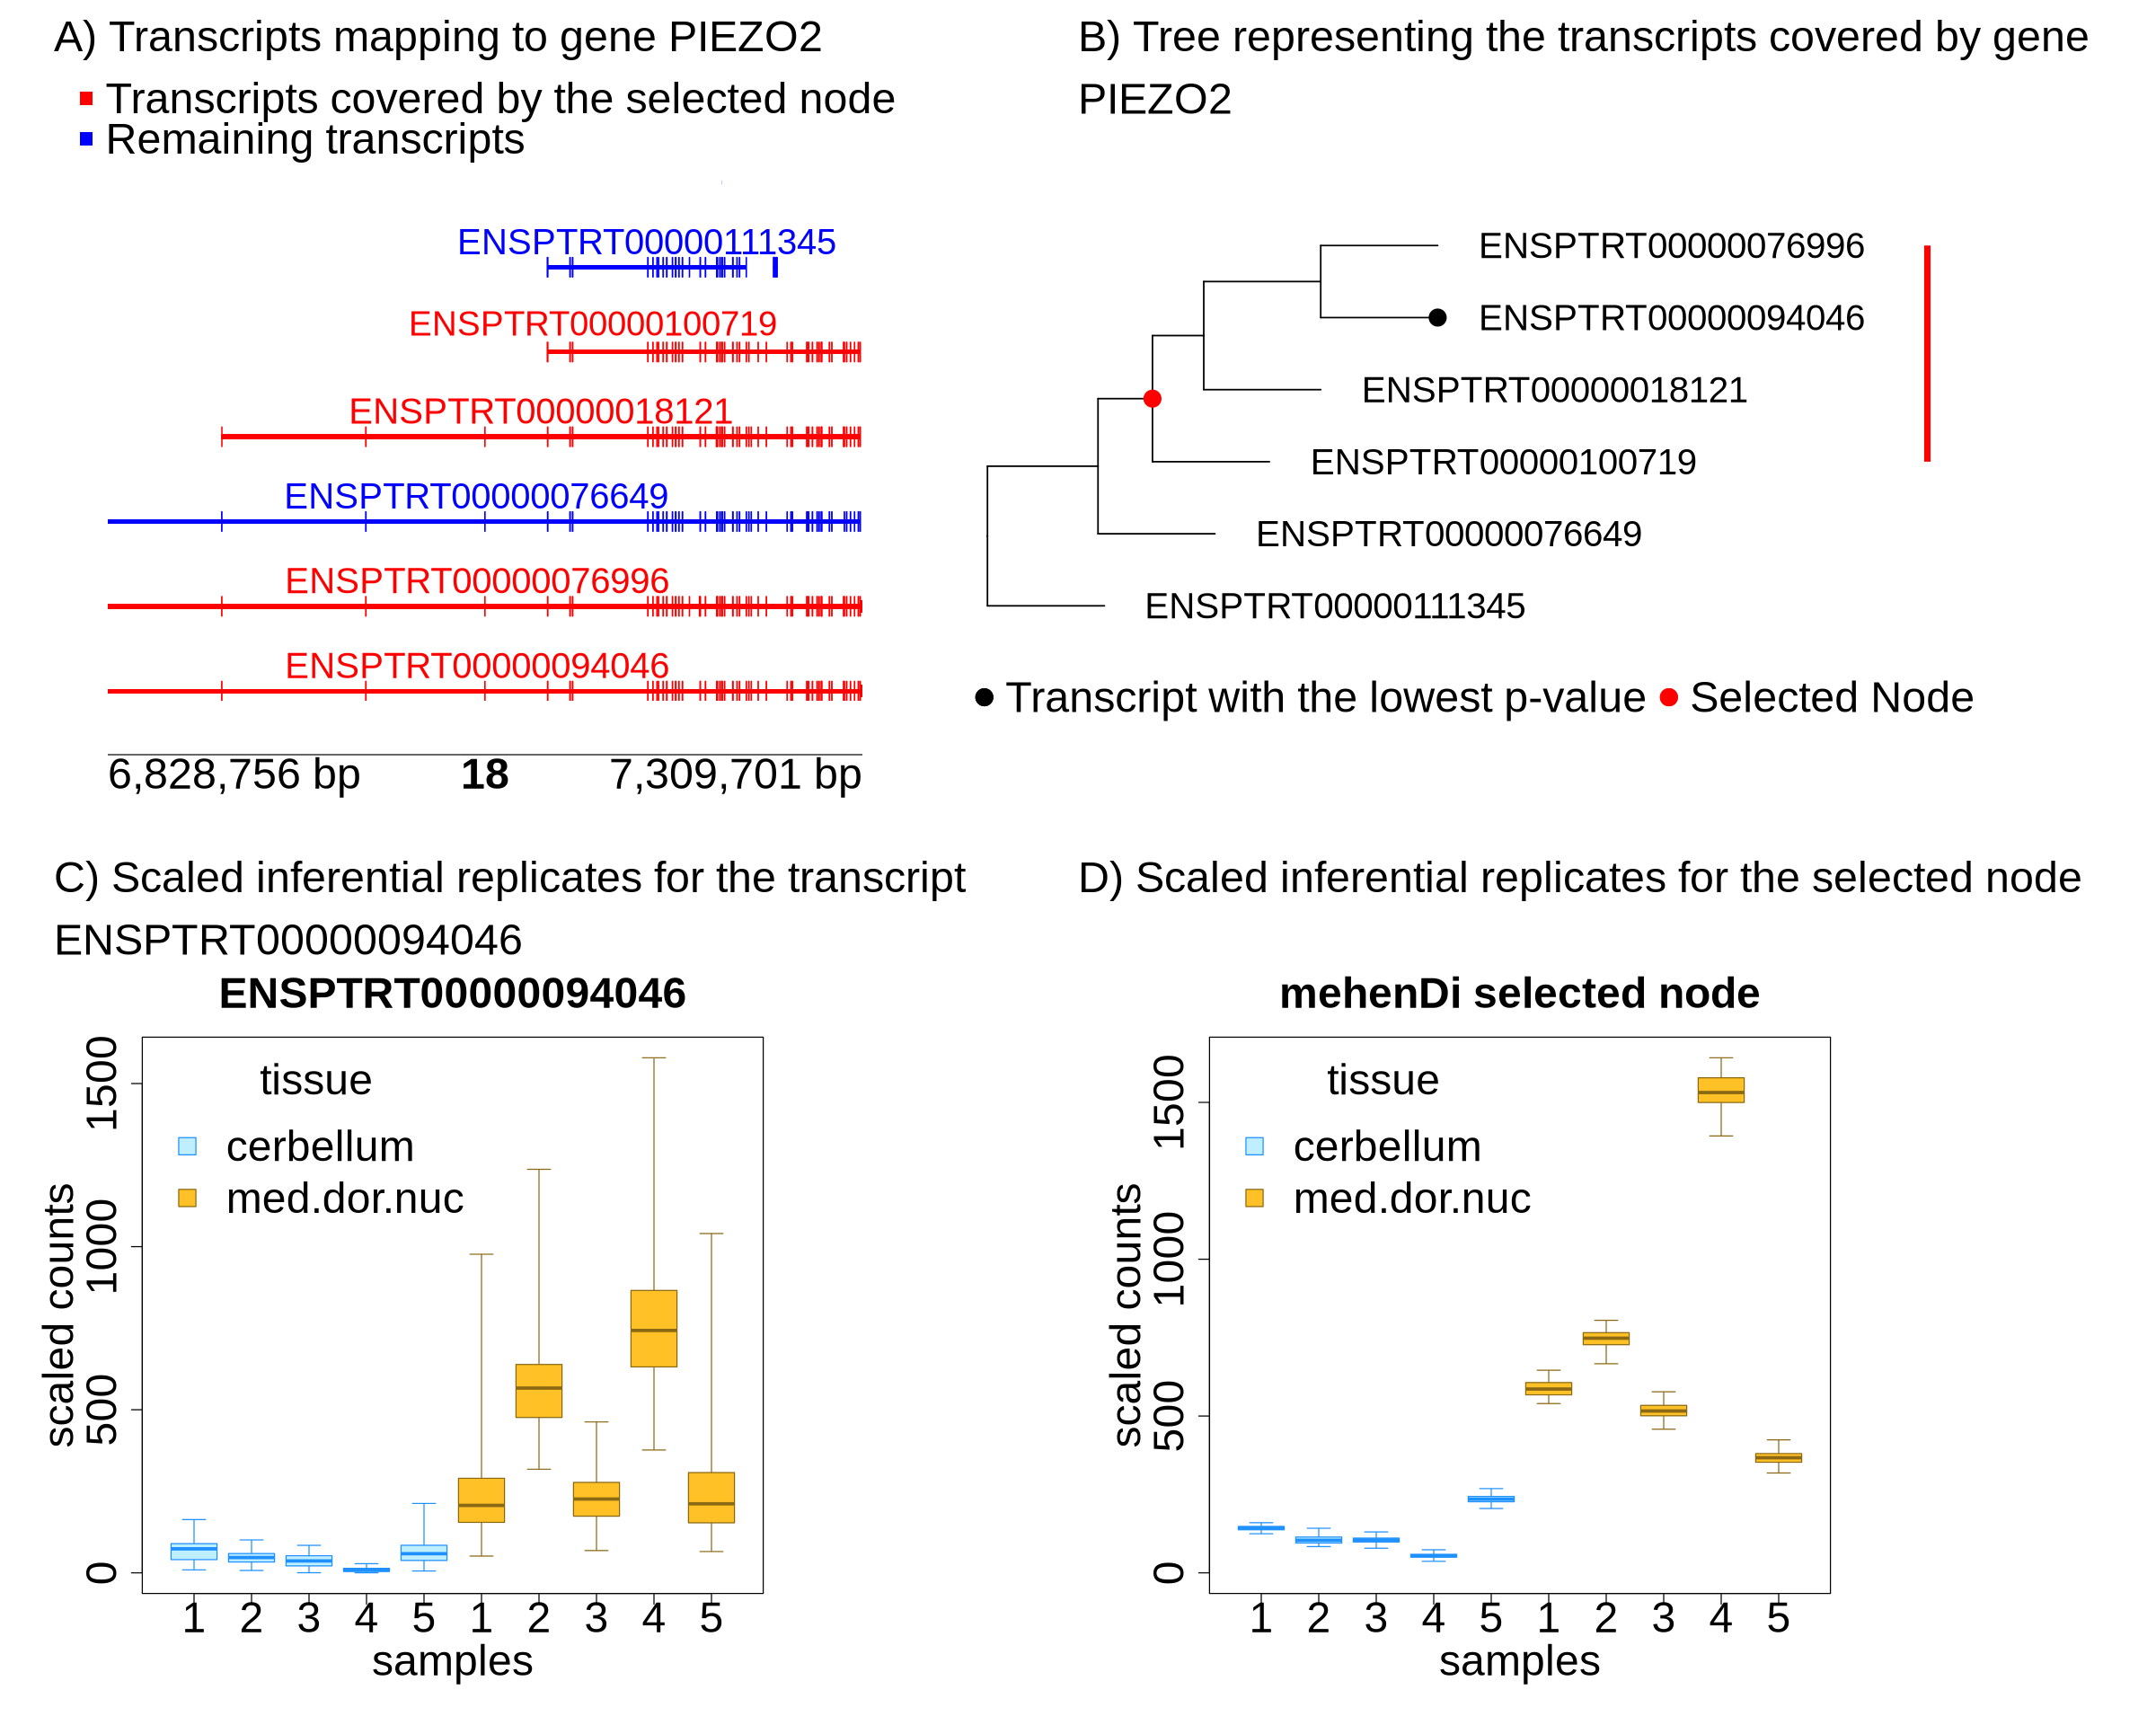

In [12]:
options(repr.plot.width=20, repr.plot.height=16)
i <- 1
j <- 62

size <- 24
cex <- 2.4
tt <- extPreInf(yAll, y, mehenDiNodes, mehenDiDegNodes, txpChimp, genesChimp, i, j)
pI <- plotIReps(yAll, tt$txpMin, tt$iNode, lp="left",x="tissue",cex=cex)
pTree <- plotTree(tt$tSub, 9, tt$minTInd, of=300, xlim=600, size = size+5, tip.size = 8.5)
pgs <- parF(tt$g, tt$txShow, tt$tSub, fs=size, assemb=assemb, chromSt = -10000, chromEnd = 10)

library(plotgardener)
pageCreate(width = 20, height = 16, showGuides = FALSE, default.units = "inches")
par <- pgs[[1]]

parText <- pgParams(
    just = c("left", "top"), fontsize = size+5
)#, fontface = "bold")
parTextB <- pgParams(
    fontcolor="red", fontsize = size
)#, fontface = "bold")

hilite <- pgs[[2]]
plotLegend(
    legend = c("Transcripts covered by the selected node", "Remaining transcripts"),
    fill = c("red", "blue"), border = FALSE,
    x = 0.5, y = 0.6, width = 1, height = 1,
    just = c("left", "top"), fontsize=size+5,
)
plotText(label="A) Transcripts mapping to gene PIEZO2", x = 0.5, y = 0.2,
        params = parText)

plotTranscripts(
    params = par, x = 1, y = 6.5, width = 7, height = 8.5, 
    spaceHeight=2.5, boxHeight=0.18,
    labels = "transcript", fill="blue", 
    transcriptHighlights = hilite
)

plotText(label="ENSPTRT00000100719", x = 5.5, y = 3,
        params = parTxpR)

plotGenomeLabel(
  params = par, x = 1, y = 7, length=7,
  just = c("left", "top"), fontsize=size+5
)

plotText(label="B) Tree representing the transcripts covered by gene \nPIEZO2", 
         x = 10, y = 0.2, params = parText)
plotGG(
    plot = pTree,
    x = 8.6, y = 1.8, width = 10, height=5
)

plotText(label="C) Scaled inferential replicates for the transcript \nENSPTRT00000094046", 
         x = 0.5, y = 8, params = parText)

plotGG(
    plot = pI[[1]],
    x = 0.5, y = 8.8, width = 7, height=7
)

plotText(label="D) Scaled inferential replicates for the selected node", 
         x = 10, y = 8, params = parText)

plotGG(
    plot = pI[[2]],
    x = 10.4, y = 8.8, width = 7, height=7
)

[1] "ENSPTRT00000103768" "ENSPTRT00000106540"

Phylogenetic tree with 5 tips and 4 internal nodes.

Tip labels:
  ENSPTRT00000077349, ENSPTRT00000026466, ENSPTRT00000078307, ENSPTRT00000103768, ENSPTRT00000106540
Node labels:
  Node60564, Node60565, Node60566, Node60567

Rooted; includes branch lengths.
[1] "Genes ENSPTRG00000014167"
            tx_name1             tx_name2             tx_name3 
"ENSPTRT00000026466" "ENSPTRT00000078307" "ENSPTRT00000077349" 
            tx_name4             tx_name5 
"ENSPTRT00000103768" "ENSPTRT00000106540" 
[1] "ENSPTRT00000077349" "ENSPTRT00000026466" "ENSPTRT00000078307"
[4] "ENSPTRT00000103768" "ENSPTRT00000106540"
[1] TRUE
[1] TRUE


legend[legend1]

text[text1]

transcripts[transcripts1]

text[text2]

text[text2]

genomeLabel[genomeLabel1]

text[text2]

gg[gg1]

text[text2]

gg[gg2]

text[text2]

gg[gg3]



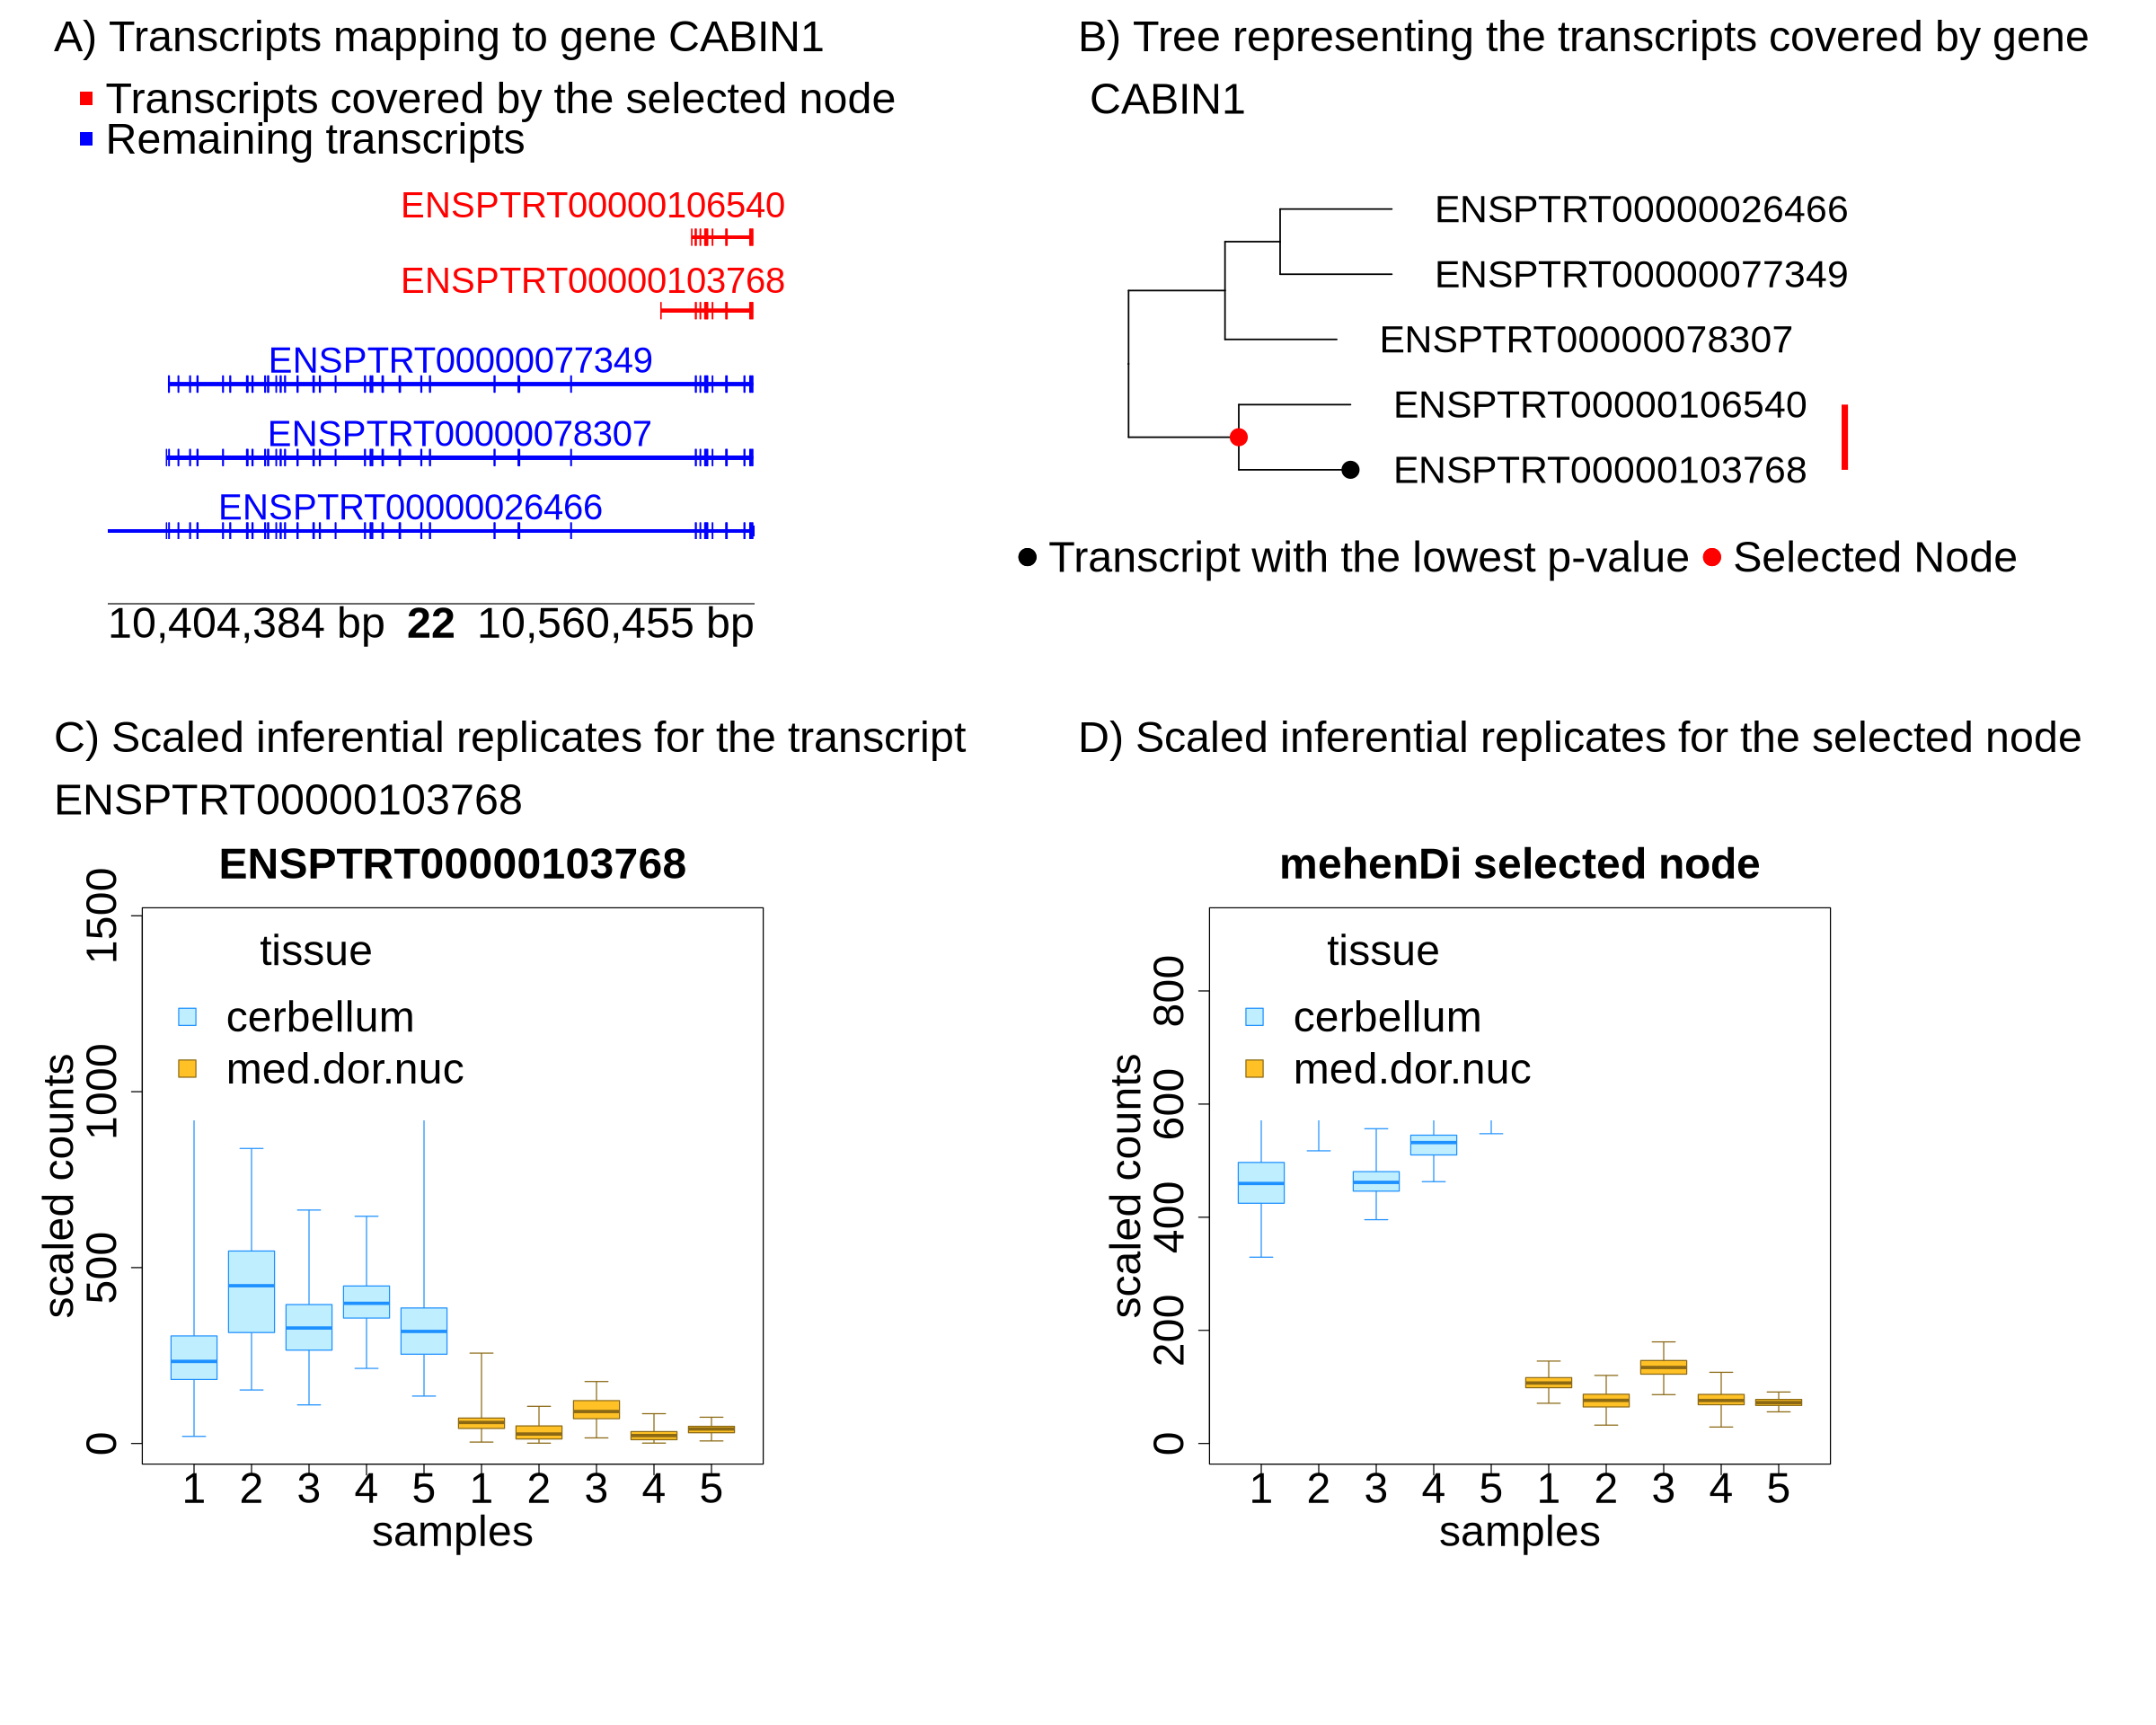

In [15]:
options(repr.plot.width=20, repr.plot.height=16)
i <- 1
j <- 230

size <- 24
cex <- 2.4

tt <- extPreInf(yAll, y, mehenDiNodes, mehenDiDegNodes, txpChimp, genesChimp, i, j)
pI <- plotIReps(yAll, tt$txpMin, tt$iNode, lp="left",x="tissue",cex=cex)
pTree <- plotTree(tt$tSub, 9, tt$minTInd, of=320, xlim=500, size = size+5, tip.size = 9)
pgs <- parF(tt$g, tt$txShow, tt$tSub,fs=size, assemb=assemb, chromSt = -10000, chromEnd = 10)

library(plotgardener)
pageCreate(width = 20, height = 16, showGuides = FALSE, default.units = "inches")
par <- pgs[[1]]

parText <- pgParams(
    just = c("left", "top"), fontsize = size+5
)#, fontface = "bold")

parTxp  <- pgParams(
    fontsize = size,
    fontcolor="red"
)

hilite <- pgs[[2]]
plotLegend(
    legend = c("Transcripts covered by the selected node", "Remaining transcripts"),
    fill = c("red", "blue"), border = FALSE,
    x = 0.5, y = 0.6, width = 1, height = 1,
    just = c("left", "top"), fontsize=size+5,
)
plotText(label="A) Transcripts mapping to gene CABIN1", x = 0.5, y = 0.2,
        params = parText)

plotTranscripts(
    params = par, x = 1, y = 5, width = 6, height = 8, 
    spaceHeight=2.5, boxHeight=0.15,
    labels = "transcript", fill="blue", 
    transcriptHighlights = hilite
)
plotText(label="ENSPTRT00000106540", x = 5.5, y = 1.9,
        params = parTxp)
plotText(label="ENSPTRT00000103768", x = 5.5, y = 2.6,
        params = parTxp)

plotGenomeLabel(
  params = par, x = 1, y = 5.6, length=6,
  just = c("left", "top"), fontsize=size+5
)

plotText(label="B) Tree representing the transcripts covered by gene\n CABIN1", 
         x = 10, y = 0.2, params = parText)
plotGG(
    plot = pTree,
    x = 10, y = 1.5, width = 8, height=4
)

plotText(label="C) Scaled inferential replicates for the transcript \nENSPTRT00000103768", 
         x = 0.5, y = 6.7, params = parText)

plotGG(
    plot = pI[[1]],
    x = 0.5, y = 7.6, width = 7, height=7
)

plotText(label="D) Scaled inferential replicates for the selected node", 
         x = 10, y = 6.7, params = parText)

plotGG(
    plot = pI[[2]],
    x = 10.4, y = 7.6, width = 7, height=7
)